In [1]:
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pprint import pprint
from config import api_key1
import glob

In [ ]:
######################################### Yelp Business API ###############################################################

In [78]:
# # https://learn.co/lessons/python-api-intro-yelp

# url = 'https://api.yelp.com/v3/businesses/search'
# headers = {
#         'Authorization': 'Bearer {}'.format(api_key1),
#     }
# print("Parameter reference:" + " " + "https://www.yelp.com/developers/documentation/v3/business_search")

# url_params = {
#                 "categories": 'restaurants, All',
#                 "location":"San Francisco",
#                 "state": "California",
#                 "is_closed": True,
#                 "limit":50
#             }
# response = requests.get(url, headers=headers, params=url_params)
# print(response)

# response_json = response.json()
# pprint(response_json)

# # Returns 59 locations for category: Food > bagels
#     # Returns 6,200 locations for category: Bagels
    
# # Returns 545 locations for category: Grocery > grocery, All

In [148]:
# url = 'https://api.yelp.com/v3/businesses/search'
# headers = {
#         'Authorization': 'Bearer {}'.format(api_key1),
#     }
# address = ["576 haight st",
#              "1801 haight st",
#               "865 market st",
#          "2155 bayshore blvd",
#              "752 jackson st",
#           "5 embarcadero ctr",
#                "523 broadway",
#            "347 presidio ave",
#                "1360 9th ave",
#           "762 divisadero st",
#         "280 golden gate ave",
#               "314 sutter st",
#               "314 sutter st",
#              "1307 sutter st",
#                 "200 pine st",
#              "575 mission st",
#              "622 jackson st",
#              "1351 church st",
#            "2049 fillmore st",
#                "121 spear st",
#          "1494 california st",
#                "73 cambon dr",
#             "6 monterey blvd",
#               "937 howard st",
#            "925 cortland ave",
#                "1865 post st",
#            "500 presidio ave",
#                "3275 22nd st",
#                "3275 22nd st",
#             "3438 mission st",
#             "59 columbus ave",
#             "3226 mission st",
#              "2605 ocean ave",
#              "2605 ocean ave",
#             "3230 mission st",
#                 "713 clay st",
#          "2827 california st",
#                "1453 18th st",
#              "836 clement st"]
    
# url_params = { #parameters passed to the API
# #     "categories": 'restaurants, All',
#     "location":"San Francisco",
#     "state": "California",
#     "address1":address,
#     "is_closed": True,
#     'offset': 50,
#      "limit":50
#      }
    
# all_responses = []

# for addresses in address:
#     responses = all_responses.append(requests.get(url, headers=headers, params=url_params).json())
# #     print(all_responses)
        

# # responses

In [79]:
# print("API documentation >>> " + " " + "https://www.yelp.com/developers/documentation/v3/all_category_list")
# response.json().keys()
# df = pd.DataFrame.from_dict(response.json()['businesses'])
# print(len(df)) #Print how many rows
# print(df.columns) #Print column names
# df.head() #Previews the first five row

In [ ]:
# #Save as csv
# df.to_csv("data/yelp_grocery.csv",index=False)
# yelp_grocery = "data/yelp_grocery.csv"
# yelp_df = pd.read_csv(yelp_grocery)
# yelp_df.head()

In [80]:
# import folium

# lat_long = response.json()['region']['center']
# lat = lat_long['latitude']
# long = lat_long['longitude']

# #Create a map of the area
# yelp_map = folium.Map([lat, long])
# yelp_map

# folium.Marker?

# for row in df.index:
#     lat_long = df['coordinates'][row]
#     lat = lat_long['latitude']
#     long = lat_long['longitude']
#     name = df['name'][row]
#     rating = df['rating'][row]
#     price = df['price'][row]
#     details = '{} Price: {} Rating:{}'.format(name,price,rating)
#     marker = folium.Marker([lat, long])
#     marker.add_to(yelp_map)
# yelp_map

In [ ]:
###################################### Clean Yelp csv from API Call #######################################################

In [81]:
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import requests
# from pprint import pprint
# from config import api_key1

# df_csv = pd.read_csv('yelp_data/output_rest.csv')
# df = pd.DataFrame(df_csv)

In [82]:
# # Split coordinates from a single field.
# df
# df['lat'], df['long'] = df['coordinates'].str.split(', ', 1).str
# df['long'].str.strip("{'longitude':}")

In [83]:
# # # Saves to an external JSON
# # with open('temp.json', 'w') as f:
# #     f.write(df.to_json(orient='records', lines=True))

# df['lat'], df['long'] = df['coordinates'].str.split(', ', 1).str
# df['lat'] =df['lat'].str.strip("{'latitude':")
# df['long'] =df['long'].str.strip("{'longitude':}")
# # df_json = df.to_json(orient='records',lines=True)
# # pprint(df_json)
# df = df.drop(columns=['coordinates', 'distance','id','phone',])
# df

In [147]:
# df.to_csv("yelp_data/yelp_rest_clean.csv",index=False)

In [ ]:
######################################### Data Cleanup: Census GeoJSON ####################################################
    # What's happening here:
        # Importing a GeoJSON with geometric polygon data containing census info per census tracts
            # Cleaning the column headers into comprehensible attributes
                # Grouping the census tracts level data into Districts (i.e. Neighborhood units)
                    # Finally, the restaurants endpoints will "intersect" the dataframe here, to create the "Master" dataset

In [84]:
# '''
# How to "easily" get data from geo json into dictionary of lists. after getting that dictionary, then make it a dataframe
# '''

#     # Note: 'CensusData_SF.geojson' was create by interecting and joining datatables to geometry in QGIS.

# import json
# with open('CensusData_SF.geojson') as f:
#     data = json.load(f)

# from pprint import pprint
# pprint(data)

In [6]:
# # Store variables into lists of dictionaries

# # https://stackoverflow.com/questions/47113449/convert-geo-json-with-nested-lists-to-pandas-dataframe

#             # IMPORTANT: Estimate Counts and Percentages per Census Tracts, NOT DISTRICTS.
    
# district = [data["features"][i]["properties"]["name"] for i in range(len(data["features"]))]
# tract = [data["features"][i]["properties"]["NAMELSAD10"] for i in range(len(data["features"]))]
# GEOID10 = [data["features"][i]["properties"]["GEOID10"] for i in range(len(data["features"]))]
# link = [data["features"][i]["properties"]["link"] for i in range(len(data["features"]))]
# Estimate10 = [data["features"][i]["properties"]["Estimate10"] for i in range(len(data["features"]))] # Count households for estimates income and benefits
# Estimate11 = [data["features"][i]["properties"]["Estimate11"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $10K, count
# Estimate12 = [data["features"][i]["properties"]["Estimate12"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $15K, count
# Estimate13 = [data["features"][i]["properties"]["Estimate13"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $25K, count
# Estimate14 = [data["features"][i]["properties"]["Estimate14"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $35K, count
# Estimate15 = [data["features"][i]["properties"]["Estimate15"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $50K, count
# Estimate16 = [data["features"][i]["properties"]["Estimate16"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $75K, count
# Estimate17 = [data["features"][i]["properties"]["Estimate17"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $100K, count
# Estimate18 = [data["features"][i]["properties"]["Estimate18"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $150K, count
# Estimate19 = [data["features"][i]["properties"]["Estimate19"] for i in range(len(data["features"]))] # Count of households with income and benefits less than $200K, count
# Estimate20 = [data["features"][i]["properties"]["Estimate20"] for i in range(len(data["features"]))] # Count of households with income and benefits more than $200K, count
# Estimate21 = [data["features"][i]["properties"]["Estimate21"] for i in range(len(data["features"]))] # Estimated Median Household income ($), ALL.
# Estimate22 = [data["features"][i]["properties"]["Estimate22"] for i in range(len(data["features"]))] # Estimated Mean Household income ($), ALL.
# Estimate23 = [data["features"][i]["properties"]["Estimate23"] for i in range(len(data["features"]))] # Count of households with food stamp benefits
# Estimate24 = [data["features"][i]["properties"]["Estimate24"] for i in range(len(data["features"]))] # Count of family households on food stamps.
# Estimate25 = [data["features"][i]["properties"]["Estimate25"] for i in range(len(data["features"]))]
# Estimate26 = [data["features"][i]["properties"]["Estimate26"] for i in range(len(data["features"]))]
# Estimate27 = [data["features"][i]["properties"]["Estimate27"] for i in range(len(data["features"]))] # Income & benefits per capita
# Estimate28 = [data["features"][i]["properties"]["Estimate28"] for i in range(len(data["features"]))] # Median earnings per workers
# # Estimate29 = [data["features"][i]["properties"]["Estimate29"] for i in range(len(data["features"]))] # Not expressed as a percentage
# Estimate = [data["features"][i]["properties"]["Estimate;"] for i in range(len(data["features"]))]
# Estimate_1 = [data["features"][i]["properties"]["Estimate_1"] for i in range(len(data["features"]))]
# Estimate_2 = [data["features"][i]["properties"]["Estimate_2"] for i in range(len(data["features"]))]
# Estimate_3 = [data["features"][i]["properties"]["Estimate_3"] for i in range(len(data["features"]))]
# Estimate_4 = [data["features"][i]["properties"]["Estimate_4"] for i in range(len(data["features"]))]
# # Estimate_5 = [data["features"][i]["properties"]["Estimate_5"] for i in range(len(data["features"]))] # Eligible for employment status, count, over 16
# Estimate_6 = [data["features"][i]["properties"]["Estimate_6"] for i in range(len(data["features"]))]
# Estimate_7 = [data["features"][i]["properties"]["Estimate_7"] for i in range(len(data["features"]))] # Labor force over 16, count, commuting to work
# Estimate_8 = [data["features"][i]["properties"]["Estimate_8"] for i in range(len(data["features"]))] # Labor force over 16, mean travel time, minutes
# Estimate_9 = [data["features"][i]["properties"]["Estimate_9"] for i in range(len(data["features"]))] # Labor force over 16, employed in the food/arts/entertainement/recreation/food services, count
# # PercentC = [data["features"][i]["properties"]["Percent; C"] for i in range(len(data["features"]))] #Estimate_7, not expressed as a percentage
# # PercentE = [data["features"][i]["properties"]["Percent; E"] for i in range(len(data["features"]))] #Estimate_5, not expressed as a percentage
# PercentI = [data["features"][i]["properties"]["Percent; I"] for i in range(len(data["features"]))] # Labor force over 16, employed in the food/arts/entertainement/recreation/food services, percentage
# PercentP = [data["features"][i]["properties"]["Percent; P"] for i in range(len(data["features"]))] # Percentage of families and people with income below the poverty level over the last 12 months
# PercentS = [data["features"][i]["properties"]["Percent; S"] for i in range(len(data["features"]))]
# Percent10 = [data["features"][i]["properties"]["Percent;10"] for i in range(len(data["features"]))] # Estimate17, Perc.
# Percent11 = [data["features"][i]["properties"]["Percent;11"] for i in range(len(data["features"]))] # Estimate18, Perc.
# Percent12 = [data["features"][i]["properties"]["Percent;12"] for i in range(len(data["features"]))] # Estimate19, Perc.
# Percent13 = [data["features"][i]["properties"]["Percent;13"] for i in range(len(data["features"]))] # Estimate20, Perc.
# # Percent14 = [data["features"][i]["properties"]["Percent;14"] for i in range(len(data["features"]))] #Estimate21, not expressed as a percentage
# # Percent15 = [data["features"][i]["properties"]["Percent;15"] for i in range(len(data["features"]))] #Estimate22, not expressed as a percentage
# Percent16 = [data["features"][i]["properties"]["Percent;16"] for i in range(len(data["features"]))] # Estimate23, Perc.
# Percent_1 = [data["features"][i]["properties"]["Percent;_1"] for i in range(len(data["features"]))]
# Percent_2 = [data["features"][i]["properties"]["Percent;_2"] for i in range(len(data["features"]))]
# Percent_3 = [data["features"][i]["properties"]["Percent;_3"] for i in range(len(data["features"]))]
# Percent_4 = [data["features"][i]["properties"]["Percent;_4"] for i in range(len(data["features"]))] # Estimate11, Perc.
# Percent_5 = [data["features"][i]["properties"]["Percent;_5"] for i in range(len(data["features"]))] # Estimate12, Perc.
# Percent_6 = [data["features"][i]["properties"]["Percent;_6"] for i in range(len(data["features"]))] # Estimate13, Perc.
# Percent_7 = [data["features"][i]["properties"]["Percent;_7"] for i in range(len(data["features"]))] # Estimate14, Perc.
# Percent_8 = [data["features"][i]["properties"]["Percent;_8"] for i in range(len(data["features"]))] # Estimate15, Perc.
# Percent_9 = [data["features"][i]["properties"]["Percent;_9"] for i in range(len(data["features"]))] # Estimate16, Perc.
# coordinates = [data["features"][i]["geometry"]["coordinates"] for i in range(len(data["features"]))]

In [85]:
# # Save list of dictionaries into a dataframe: https://stackoverflow.com/questions/42869544/dictionary-of-lists-to-dataframe

# d={
#     'district': district,
#     'tract': tract,
#     'link': link,
#     'GEOID' : GEOID10,
#     'coordinates':coordinates,
#     'inc_medianEst_All' : Estimate21,
#     'inc_meanEst_All' : Estimate22,
#     'househOnFS_medianInc' : Estimate25, 
#     'househOnFS_meanInc' : Estimate26, 
#     'inc_perCapita' : Estimate27,
#     'workers_medianEarnings' : Estimate28,
#     'pop_total_C' : Estimate, 
#     'pop_male_C' : Estimate_1,
#     'pop_female_C' : Estimate_2,
#     'median_age' : Estimate_3,
#     'popOver21_C' : Estimate_4, 
#     'inLaborForceOver16_C' : Estimate_6, 
#     'commToWork_C' : Estimate_7,
#     'commToWork_meanMins' : Estimate_8,
#     'labor_indus_C' : Estimate_9,
#     'labor_indus_P' : PercentI,
#     'inc_belowpovertylv_P' : PercentP,
#     'pop_male_P' : PercentS,
#     'inc_househ_100K_P' : Percent10,
#     'inc_househ_150K_P' : Percent11,
#     'inc_househ_200K_P' : Percent12,
#     'inc_househ_+200K_P' : Percent13,
#     'househOnFS_P' : Percent16,
#     'pop_female_P' : Percent_1,
#     'popOver21_P' : Percent_2,
#     'inLaborForceOver16_P' : Percent_3,
#     'inc_househ_10K_P' : Percent_4,
#     'inc_househ_15K_P' : Percent_5,
#     'inc_househ_25K_P' : Percent_6,
#     'inc_househ_35K_P' : Percent_7,
#     'inc_househ_50K_P' : Percent_8, 
#     'inc_househ_75K_P' : Percent_9   
# }

# census_df=pd.DataFrame.from_dict(d,orient='index').transpose()
# census_df

In [86]:
# print(census_df.shape)
# print(regression_df.shape)

# regression_df = census_df.drop(['district'], axis=1)
# regression_df = regression_df.drop_duplicates("tract")
# regression_df.keys()
# regression_df.dtypes

In [ ]:
######################################### Google Places API ###############################################################

In [ ]:
# https://www.geeksforgeeks.org/python-get-set-places-according-search-query-using-google-places-api/
from config import api_key2

api_key = api_key2
url = 'https://maps.googleapis.com/maps/api/place/textsearch/json?'

query = input('Search query: ')
response = requests.get(url + 'query=' + query +
                        '&key=' + api_key)

print(response)
 
# json method of response object convert
#  json format data into python format data
response_json = response.json()
pprint(response_json)

# now x contains list of nested dictionaries
# we know dictionary contain key value pair
# store the value of result key in variable y
y = x['results']
 
# keep looping upto lenght of y
for i in range(len(y)):
     
    # Print value corresponding to the
    # 'name' key at the ith index of y
    print(y[i]['name'])

In [ ]:
response.json().keys()

In [ ]:
df = pd.DataFrame.from_dict(response.json()['results'])
print(len(df)) #Print how many rows
print(df.columns) #Print column names
df.head() #Previews the first five row

In [ ]:
######################################### Open Data SF ###############################################################

In [ ]:
RBL_df =pd.read_csv("data/Registered_Business_Locations.csv")

print(list(RBL_df))
print(RBL_df.shape)

print(RBL_df['NAICS Code Description'].unique()) #narrow the scope of the types of businesses we're searching for



RBL_df.loc[RBL_df['NAICS Code Description'] == "Food Services"]

In [ ]:
######################################### Yelp with ZipCodes (FAILED) ##################################################

In [ ]:
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
# https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html

In [24]:
path =r'yelp_data/yelpData_byZips' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
print(frame.shape)
frame

(30400, 16)


alias  \
0                super-duper-burgers-san-francisco-6   
1               crepevine-restaurant-san-francisco-2   
2                       hai-ky-noodles-san-francisco   
3             old-jerusalem-restaurant-san-francisco   
4                    just-for-you-cafe-san-francisco   
5                  trattoria-contadina-san-francisco   
6                               tataki-san-francisco   
7         honey-honey-cafe-and-crepery-san-francisco   
8                            franchino-san-francisco   
9                           the-bird-san-francisco-2   
10                    gialina-pizzeria-san-francisco   
11                         han-il-kwan-san-francisco   
12             fino-ristorante-and-bar-san-francisco   
13                         flour-water-san-francisco   
14                the-flying-falafel-san-francisco-3   
15                     rustys-southern-san-francisco   
16                                yamo-san-francisco   
17                         cordon-bleu-san-francisco   
18                           starbelly-san-francisco   
19                   kabuto-restaurant-san-francisco   
20                          outerlands-san-francisco   
21                           zeitgeist-san-francisco   
22                         yank-sing-san-francisco-2   
23                 baonecci-ristorante-san-francisco   
24                  pizzeria-delfina-san-francisco-3   
25   american-grilled-cheese-kitchen-san-francisco-2   
26                       amber-india-san-francisco-3   
27                   fresh-brew-coffee-san-francisco   
28                         dinosaurs-san-francisco-4   
29                            walzwerk-san-francisco   
..                                               ...   
920                      west-of-pecos-san-francisco   
921                          padrecito-san-francisco   
922                             hinata-san-francisco   
923                           alegrias-san-francisco   
924     pier-market-seafood-restaurant-san-francisco   
925                         crustacean-san-francisco   
926                              maven-san-francisco   
927                        darwin-cafe-san-francisco   
928                    cafe-jacqueline-san-francisco   
929           district-san-francisco-san-francisco-3   
930                  delicious-dim-sum-san-francisco   
931      enjoy-vegetarian-restaurant-san-francisco-3   
932                               1760-san-francisco   
933                        daigo-sushi-san-francisco   
934                 kasa-indian-eatery-san-francisco   
935                           za-pizza-san-francisco   
936                         chambers-san-francisco-3   
937              noeteca-cafe-wine-bar-san-francisco   
938                            upcider-san-francisco   
939                        ty-sandwich-san-francisco   
940                   caffe-macaroni-san-francisco-4   
941                        osha-thai-san-francisco-3   
942              super-duper-burgers-san-francisco-5   
943                      sushirrito-san-francisco-54   
944                      roccos-café-san-francisco-3   
945                           hot-spud-san-francisco   
946                         salt-house-san-francisco   
947                      little-heaven-san-francisco   
948                freddies-sandwiches-san-francisco   
949                           teeth-sf-san-francisco   

                                            categories  \
0    [{'alias': 'burgers', 'title': 'Burgers'}, {'a...   
1    [{'alias': 'creperies', 'title': 'Creperies'},...   
2    [{'alias': 'chinese', 'title': 'Chinese'}, {'a...   
3    [{'alias': 'mideastern', 'title': 'Middle East...   
4    [{'alias': 'tradamerican', 'title': 'American ...   
5           [{'alias': 'italian', 'title': 'Italian'}]   
6    [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...   
7    [{'alias': 'breakfast_brunch', 'title': 'Break...   
8           [{'alias': 'italian', 'title': 'Italian'

In [25]:
frame = frame.drop_duplicates("alias")
print(frame.shape)

(950, 16)


In [ ]:
######################################### API Endpoints Final Cleanup ##################################################

In [104]:
df_csv = pd.read_csv('yelp_data/output_rest.csv')
yelp_df = pd.DataFrame(df_csv)

In [105]:
select_columns = yelp_df.drop(['alias','display_phone', 'distance', 'id', 'image_url', 'phone', 'transactions', 'url'], axis=1)
yelp_df = select_columns.rename(columns={"alias":"Alias", "categories":"Categories", 'coordinates': 'Coordinates', 'is_closed': 'Is Closed', 'location': 'Location', 'name': 'Name', 'price': 'Price', 'rating': 'Rating', 'review_count': 'Review Count'})

yelp_df['lat'], yelp_df['long'] = yelp_df['Coordinates'].str.split(', ', 1).str
yelp_df['lat'] =yelp_df['lat'].str.strip("{'latitude':")
yelp_df['long'] =yelp_df['long'].str.strip("{'longitude':}")


def clean_up_location(row):
    s_new = row.split("[")[1][:-3]
    return s_new.replace("'", "")

yelp_df.loc[:, 'Address'] = yelp_df.Location.apply(clean_up_location)

yelp_df['St_Address']=yelp_df['Address'].str.split(',').str[0].str.lower()


# yelp_df= yelp_df.replace(['$', '$$', '$$$', '$$$$'], [1, 2, 3, 4]).head()

yelp_df=yelp_df.drop(columns=['Coordinates','Location'])

print(len(yelp_df))
yelp_df.head()

950


Categories  Is Closed  \
0  [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...      False   
1  [{'alias': 'seafood', 'title': 'Seafood'}, {'a...      False   
2  [{'alias': 'desserts', 'title': 'Desserts'}, {...      False   
3  [{'alias': 'seafood', 'title': 'Seafood'}, {'a...      False   
4  [{'alias': 'pizza', 'title': 'Pizza'}, {'alias...      False   

                               Name Price  Rating  Review Count  \
0  Shizen Vegan Sushi Bar & Izakaya    $$     4.5          1118   
1                Scoma's Restaurant   $$$     4.0          3129   
2          Genki Crepes & Mini-Mart     $     4.0          2112   
3                         Bar Crudo   $$$     4.0          1771   
4  Pizzeria Delfina - San Francisco    $$     4.0          2199   

                 lat                long  \
0          37.768314         -122.421642   
1          37.808944         -122.418462   
2           37.78326          -122.46283   
3   37.7756673618778   -122.438271045685   
4         37.7614143        -122.4242316   

                                      Address         St_Address  
0        370 14th St, San Francisco, CA 94103        370 14th st  
1  1965 Al Scoma Way, San Francisco, CA 94133  1965 al scoma way  
2     330 Clement St, San Francisco, CA 94118     330 clement st  
3  655 Divisadero St, San Francisco, CA 94117  655 divisadero st  
4       3611 18th St, San Francisco, CA 94110       3611 18th st

In [ ]:
#********************************* Match with the Yelp Datasets (DROPPED) ************************************************

In [109]:
fm_csv = pd.read_csv('final-merged.csv')
fm_df = pd.DataFrame(fm_csv)
print(len(fm_df))
# fm_df['formatted_address']=fm_df['formatted_address'].str.strip(", USA")
fm_df['street_address']=fm_df['street_address'].str.lower() # Not leaving anything to chance.
fm_df.dtypes

3432


business_name           object
category                object
lic_code                object
street_address          object
State                   object
City                    object
zipcode                float64
business_start_date     object
business_end_date       object
neighborhoods           object
business_location       object
supervisor_district    float64
Lifespan               float64
closed                  object
age_if_opened          float64
formatted_address_x     object
formatted_name_x        object
uniqueid                object
business_id              int64
name                    object
MA                     float64
year                   float64
formatted_address_y     object
formatted_name_y        object
latitude               float64
longitude              float64
dtype: object

In [127]:
merged_df = fm_df.merge(yelp_df, left_on=['street_address'], right_on=['St_Address'] )
len(merged_df)
merged_df

business_name       category  \
0                                       tommys joynt  Food Services   
1                   cc san francisco centre emporium  Food Services   
2                   cc san francisco centre emporium  Food Services   
3                                     buckhorn grill  Food Services   
4                                     buckhorn grill  Food Services   
5                                         loving hut  Food Services   
6                                         loving hut  Food Services   
7                              the cheese steak shop  Food Services   
8                          memphis minnies bbq joint  Food Services   
9                          memphis minnies bbq joint  Food Services   
10                         memphis minnies bbq joint  Food Services   
11                                        red chilli  Food Services   
12                                        red chilli  Food Services   
13                                        red chilli  Food Services   
14                                        red chilli  Food Services   
15                                osakaya restaurant  Food Services   
16                                   andersen bakery  Food Services   
17                                 benihana of tokyo  Food Services   
18                            cha cha cha restaurant  Food Services   
19                                       cha cha cha  Food Services   
20                                      pacific cafe  Food Services   
21                                delfina restaurant  Food Services   
22                          delfina restaurant group  Food Services   
23            guckenheimer 114201  coffee 12th floor  Food Services   
24   guckenheimer 114201  catering pantry 12th floor  Food Services   
25         guckenheimer 114201  12th floor breakroom  Food Services   
26                               guckenheimer 114201  Food Services   
27                            starbucks coffee #9211  Food Services   
28                                    halal cart llc  Food Services   
29                                     halal cart sf  Food Services   
..                                               ...            ...   
635                                pakwan restaurant  Food Services   
636                                     jakes steaks  Food Services   
637                     old jerusalem restaurant inc  Food Services   
638                                   paulines pizza  Food Services   
639                                 house of nanking  Food Services   
640                                    basil canteen  Food Services   
641                                         eight am  Food Services   
642                       perilla vietnamese cuisine  Food Services   
643                                        poki time  Food Services   
644                                         la folie  Food Services   
645                                  cafe jacqueline  Food Services   
646                                    nob hill cafe  Food Services   
647                                             lupa  Food Services   
648                              brothers restaurant  Food Services   
649                              la corneta taqueria  Food Services   
650                                   hazels kitchen  Food Services   
651                             pagan restaurant llc  Food Services   
652                     muraccis japanese restaurant  Food Services   
653                    chaya vegetarain japanese res  Food Services   
654                                  chez maman west  Food Services   
655                                   thrive cleanse  Food Services   
656                                       sushi toni  Food Services   
657                             basa seafood express  Food Services   
658                     imperial tea courtferry bldg  Food Services   
659                     imperial tea courtferry bldg  Food Serv

In [128]:
print(merged_df['Name'].nunique())
merged_df.dtypes

507


business_name           object
category                object
lic_code                object
street_address          object
State                   object
City                    object
zipcode                float64
business_start_date     object
business_end_date       object
neighborhoods           object
business_location       object
supervisor_district    float64
Lifespan               float64
closed                  object
age_if_opened          float64
formatted_address_x     object
formatted_name_x        object
uniqueid                object
business_id              int64
name                    object
MA                     float64
year                   float64
formatted_address_y     object
formatted_name_y        object
latitude               float64
longitude              float64
Categories              object
Is Closed                 bool
Name                    object
Price                   object
Rating                 float64
Review Count             int64
lat     

In [141]:
# Trying to call the Yelp API by addresses. Failed.

merged_df.closed.value_counts()
get_address = merged_df.loc[merged_df['closed'] == 'yes']
get_address = get_address['street_address']
get_address.update('"' + get_address.astype(str) + '",')
print(get_address.to_string(index=False))

"576 haight st",
     "1801 haight st",
      "865 market st",
 "2155 bayshore blvd",
     "752 jackson st",
  "5 embarcadero ctr",
       "523 broadway",
   "347 presidio ave",
       "1360 9th ave",
  "762 divisadero st",
"280 golden gate ave",
      "314 sutter st",
      "314 sutter st",
     "1307 sutter st",
        "200 pine st",
     "575 mission st",
     "622 jackson st",
     "1351 church st",
   "2049 fillmore st",
       "121 spear st",
 "1494 california st",
       "73 cambon dr",
    "6 monterey blvd",
      "937 howard st",
   "925 cortland ave",
       "1865 post st",
   "500 presidio ave",
       "3275 22nd st",
       "3275 22nd st",
    "3438 mission st",
    "59 columbus ave",
    "3226 mission st",
     "2605 ocean ave",
     "2605 ocean ave",
    "3230 mission st",
        "713 clay st",
 "2827 california st",
       "1453 18th st",
     "836 clement st",


C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Conclusion: The Yelp Fusion API is becoming more of a hinderance than a dataset which could enrich our understanding of our data.
    # The final merge csv has far more data points which can be intersected againt Census Data. 

In [ ]:
#************************************************ Census Data Round Two ************************************************

Whole Dataset
(3432, 26)
2606
---------------------------------------------------
(293, 26)
240


C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Filtered to closed restaurants
[2017 2015 2018 2016 1979 2014 2013]
['new york pizza kitchen' 'corner bakery cafe #1584' 'the sausage factory'
 'mr bread' 'babys eatery and palabok' 'sushi shoh' 'peaches patties'
 'peoples bistro' 'my canh restaurant' 'lapisara eatery'
 'la canasta produce' 'happy donuts' 'memphis minnies bbq joint'
 'wing lee bakery' 'el meson de violeta' 'el pipila llc'
 'yin du wonton noodle llc' 'sf hole in the wall pizza' 'wing wings'
 'cafe valencia' 'cha cha cha' 'sugoi sushi'
 'joey and pats bakery  coffee' 'r caffe' 'la cocina' 'bay subs  deli'
 'blue fog market' 'chez marius' 'the fog lifter cafe'
 'cityscape bar  lounge' 'sf hilton banquet facilities'
 'sf hilton employee cafe' 'sf hilton main kitchen'
 'sf hilton pastry bakery kitchen' 'la fromagerie' 'elmira rosticceria'
 'piccolo petes' '77 chinese cuisine' 'grinders pizzaeria' 'cento coffee'
 'delicious dim sum' 'alice chinese bistro' 'oye managua' 'the cake house'
 'crepe  curry' 'chestnut street coffee

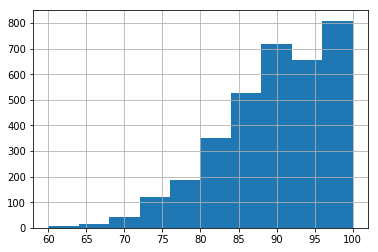

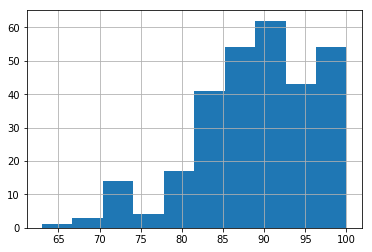

In [70]:
fm_csv = pd.read_csv('final-merged.csv')
fm_df = pd.DataFrame(fm_csv)
print('Whole Dataset')
print(fm_df.shape)
print(fm_df['name'].nunique())

plt.figure();
fm_df['MA'].hist()

# Restaurants that closed
fmCl_df = fm_df.loc[fm_df['closed'] == 'yes']
print('---------------------------------------------------')
print(fmCl_df.shape)
print(fmCl_df['name'].nunique())

plt.figure();
fmCl_df['MA'].hist()


# Need to isolate the data so I know which Census Year to attribute to each endpoint.
fmCl_df['closingYear'] = pd.to_datetime(fmCl_df['business_end_date'])
fmCl_df['closingYear'] = fmCl_df['closingYear'].dt.year

print('Filtered to closed restaurants')
print(fmCl_df['closingYear'].unique())
print(fmCl_df['name'].unique())

In [71]:
import json
with open('CensusDataV2.geojson') as f:
    data = json.load(f)

from pprint import pprint
pprint(data)

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4269'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[[-122.44319771298308,
                                               37.77621766625396],
                                              [-122.443132, 37.776226],
                                              [-122.441488, 37.776435],
                                              [-122.4413, 37.775505],
                                              [-122.44111, 37.774567],
                                              [-122.440922, 37.773635],
                                              [-122.442565, 37.773424],
                                              [-122.444216, 37.773212],
                                              [-122.445902, 37.772995],
                                              [-122.447497, 37.77279],
                                              [-122.449143, 37.772579],
                                              [-122.450787, 37.772368

                                               37.77685588800006],
                                              [-122.43742293899993,
                                               37.773133492000056],
                                              [-122.43891430581975,
                                               37.77294412513327],
                                              [-122.439089, 37.772922],
                                              [-122.440735, 37.772713],
                                              [-122.440922, 37.773635],
                                              [-122.44111, 37.774567],
                                              [-122.4413, 37.775505],
                                              [-122.441488, 37.776435],
                                              [-122.44034, 37.77658]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 164, San Francisco '
                            

                              'HD01_S180': 1811,
                              'HD01_S181': 355,
                              'HD01_S184': 1456,
                              'HD02_S026': '52.9',
                              'HD02_S051': '47.1',
                              'HD02_S151': '23.9',
                              'HD02_S170': '92.8',
                              'HD02_S171': '7.2',
                              'HD02_S180': '100',
                              'HD02_S181': '19.6',
                              'HD02_S184': '80.4',
                              'NAMELSAD10': 'Census Tract 164',
                              'link': 'http://en.wikipedia.org/wiki/Alamo_Square,_San_Francisco',
                              'name': 'Alamo Square'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.43942114113476,
                                               37.77669777689228],
                                              [-122.438177068

                              'HD01_S020': 33.5,
                              'HD01_S026': 2285,
                              'HD01_S045': 34.7,
                              'HD01_S051': 2008,
                              'HD01_S070': 32.5,
                              'HD01_S151': 548,
                              'HD01_S169': 2185,
                              'HD01_S170': 2047,
                              'HD01_S171': 138,
                              'HD01_S180': 2047,
                              'HD01_S181': 354,
                              'HD01_S184': 1693,
                              'HD02_S026': '53.2',
                              'HD02_S051': '46.8',
                              'HD02_S151': '26.8',
                              'HD02_S170': '93.7',
                              'HD02_S171': '6.3',
                              'HD02_S180': '100',
                              'HD02_S181': '17.3',
                              'HD02_S184': '82.7',
         

                                              [-122.42701675699993,
                                               37.78019303000008],
                                              [-122.42720275599993,
                                               37.78111712600008],
                                              [-122.42739639799993,
                                               37.782056939000086],
                                              [-122.42739640000941,
                                               37.78205694893497]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 161, San Francisco '
                                            'County, California',
                              'GEOID10': '6075016100',
                              'HC01_VC05': 1777,
                              'HC01_VC113': '61200',
                              'HC01_VC115': '23735',
                              'HC01_VC117': 1692

                                              [-122.42063821019678,
                                               37.78196058342817],
                                              [-122.42063824899992,
                                               37.781960765000065],
                                              [-122.4206381096671,
                                               37.78196078265974]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 160, San Francisco '
                                            'County, California',
                              'GEOID10': '6075016000',
                              'HC01_VC05': 1540,
                              'HC01_VC113': '108988',
                              'HC01_VC115': '50542',
                              'HC01_VC117': 1218,
                              'HC01_VC121': '52157',
                              'HC01_VC13': '(X)',
                              

                                              [-122.4262256259999,
                                               37.785274195000056],
                                              [-122.42704811996879,
                                               37.785170709174736]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 159, San Francisco '
                                            'County, California',
                              'GEOID10': '6075015900',
                              'HC01_VC05': 2181,
                              'HC01_VC113': '71626',
                              'HC01_VC115': '34914',
                              'HC01_VC117': 1331,
                              'HC01_VC121': '31416',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2066,
                              'HC01_VC36': '29',
                              'HC01_VC41': 892,
                   

                              'NAMELSAD10': 'Census Tract 157',
                              'link': 'http://en.wikipedia.org/wiki/Lone_Mountain,_San_Francisco,_California',
                              'name': 'Lone Mountain'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.44730131161009,
                                               37.78239209013075],
                                              [-122.446775, 37.782461],
                                              [-122.445853, 37.78251],
                                              [-122.445826, 37.782512],
                                              [-122.445803, 37.782513],
                                              [-122.44572193274846,
                                               37.782517405828884],
                                              [-122.44571066899994,
                                               37.78251791200006],
                                         

                              'HD02_S170': '93.5',
                              'HD02_S171': '6.5',
                              'HD02_S180': '100',
                              'HD02_S181': '32.6',
                              'HD02_S184': '67.4',
                              'NAMELSAD10': 'Census Tract 157',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/goldengatepark/',
                              'name': 'Golden Gate Park'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.441678, 37.777373],
                                              [-122.441634, 37.777156],
                                              [-122.44148801511474,
                                               37.77643507464202],
                                              [-122.44148832699995,
                                               37.77643503500008],
                                              [-122.44313245399991,
           

                              'HD02_S051': '51.8',
                              'HD02_S151': '39.2',
                              'HD02_S170': '90.9',
                              'HD02_S171': '9.1',
                              'HD02_S180': '100',
                              'HD02_S181': '33.4',
                              'HD02_S184': '66.6',
                              'NAMELSAD10': 'Census Tract 156',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/innerrichmond/',
                              'name': 'Inner Richmond'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.454683, 37.774755],
                                              [-122.45493104891979,
                                               37.77472540819904],
                                              [-122.45468296819777,
                                               37.77475544523127],
                                              [-122.

                              'HD02_S181': '12.1',
                              'HD02_S184': '87.9',
                              'NAMELSAD10': 'Census Tract 155',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Cathedral_Hill',
                              'name': 'Cathedral Hill'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.432914, 37.784355],
                                              [-122.43291429838095,
                                               37.78435529305273],
                                              [-122.4330833979999,
                                               37.78515094000005],
                                              [-122.43327150544734,
                                               37.78608506274544],
                                              [-122.432271, 37.786212],
                                              [-122.431552, 37.786304],
      

                              'HC03_VC81': '11.1',
                              'HC03_VC82': '15.2',
                              'HC03_VC83': '14.1',
                              'HC03_VC84': '12.4',
                              'HD01_S001': 5621,
                              'HD01_S020': 37.7,
                              'HD01_S026': 2619,
                              'HD01_S045': 37.6,
                              'HD01_S051': 3002,
                              'HD01_S070': 37.8,
                              'HD01_S151': 1107,
                              'HD01_S169': 3088,
                              'HD01_S170': 2839,
                              'HD01_S171': 249,
                              'HD01_S180': 2839,
                              'HD01_S181': 853,
                              'HD01_S184': 1986,
                              'HD02_S026': '46.6',
                              'HD02_S051': '53.4',
                              'HD02_S151': '39',
          

                              'HC03_VC41': '63.7',
                              'HC03_VC42': '7',
                              'HC03_VC43': '21.6',
                              'HC03_VC44': '4.4',
                              'HC03_VC45': '3.3',
                              'HC03_VC50': '0',
                              'HC03_VC51': '3',
                              'HC03_VC52': '5.8',
                              'HC03_VC53': '2.1',
                              'HC03_VC54': '6.3',
                              'HC03_VC55': '2.4',
                              'HC03_VC56': '7.2',
                              'HC03_VC57': '10.1',
                              'HC03_VC58': '21.5',
                              'HC03_VC59': '25.9',
                              'HC03_VC60': '6.2',
                              'HC03_VC61': '6.8',
                              'HC03_VC62': '2.7',
                              'HC03_VC67': '73.2',
                              'HC03_VC68': '14.7',

                              'HC03_VC79': '9.4',
                              'HC03_VC80': '12.6',
                              'HC03_VC81': '10.5',
                              'HC03_VC82': '11',
                              'HC03_VC83': '8.2',
                              'HC03_VC84': '12',
                              'HD01_S001': 3934,
                              'HD01_S020': 40.0,
                              'HD01_S026': 1725,
                              'HD01_S045': 40.1,
                              'HD01_S051': 2209,
                              'HD01_S070': 40.0,
                              'HD01_S151': 574,
                              'HD01_S169': 2624,
                              'HD01_S170': 2430,
                              'HD01_S171': 194,
                              'HD01_S180': 2430,
                              'HD01_S181': 541,
                              'HD01_S184': 1889,
                              'HD02_S026': '43.8',
               

                              'link': 'http://www.sfgate.com/neighborhoods/sf/pacificheights/',
                              'name': 'Pacific Heights'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.421193, 37.784753],
                                              [-122.422838, 37.784547],
                                              [-122.42304, 37.784553],
                                              [-122.423325, 37.784615],
                                              [-122.423612, 37.784766],
                                              [-122.423874, 37.785003],
                                              [-122.42417, 37.785193],
                                              [-122.424538, 37.785274],
                                              [-122.424687, 37.785335],
                                              [-122.424858, 37.786196],
                                              [-122.425047, 37.78713],
                      

                                              [-122.43383965399994,
                                               37.78890628400006],
                                              [-122.43494783806706,
                                               37.78876533283353],
                                              [-122.435486, 37.788697],
                                              [-122.435581, 37.789172],
                                              [-122.435673, 37.789629],
                                              [-122.435849, 37.790502],
                                              [-122.436026, 37.791383],
                                              [-122.436204, 37.792263],
                                              [-122.434558, 37.792472],
                                              [-122.432918, 37.79268],
                                              [-122.431263, 37.792889],
                                              [-122.429625, 37.793098],
           

               'properties': {'GEO.displa': 'Census Tract 133, San Francisco '
                                            'County, California',
                              'GEOID10': '6075013300',
                              'HC01_VC05': 2021,
                              'HC01_VC113': '323429',
                              'HC01_VC115': '101013',
                              'HC01_VC117': 836,
                              'HC01_VC121': '80364',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1925,
                              'HC01_VC36': '26.2',
                              'HC01_VC41': 1152,
                              'HC01_VC42': 140,
                              'HC01_VC43': 596,
                              'HC01_VC44': 18,
                              'HC01_VC45': 35,
                              'HC01_VC50': 21,
                              'HC01_VC51': 18,
                              'HC01_VC52': 79,
           

                              'HC01_VC85': '119773',
                              'HC01_VC86': '220455',
                              'HC01_VC89': '197872',
                              'HC01_VC99': 0,
                              'HC03_VC05': '64.3',
                              'HC03_VC13': '4',
                              'HC03_VC156': '0',
                              'HC03_VC28': 1925,
                              'HC03_VC41': '59.4',
                              'HC03_VC42': '7.2',
                              'HC03_VC43': '30.7',
                              'HC03_VC44': '0.9',
                              'HC03_VC45': '1.8',
                              'HC03_VC50': '1.1',
                              'HC03_VC51': '0.9',
                              'HC03_VC52': '4.1',
                              'HC03_VC53': '3.6',
                              'HC03_VC54': '2.2',
                              'HC03_VC55': '0.5',
                              'HC03_VC56': '5.

                              'HD01_S026': 2013,
                              'HD01_S045': 40.6,
                              'HD01_S051': 2149,
                              'HD01_S070': 40.1,
                              'HD01_S151': 858,
                              'HD01_S169': 2590,
                              'HD01_S170': 2260,
                              'HD01_S171': 330,
                              'HD01_S180': 2260,
                              'HD01_S181': 857,
                              'HD01_S184': 1403,
                              'HD02_S026': '48.4',
                              'HD02_S051': '51.6',
                              'HD02_S151': '38',
                              'HD02_S170': '87.3',
                              'HD02_S171': '12.7',
                              'HD02_S180': '100',
                              'HD02_S181': '37.9',
                              'HD02_S184': '62.1',
                              'NAMELSAD10': 'Census Tract 1

              {'geometry': {'coordinates': [[[[-122.437138, 37.796879],
                                              [-122.43695006365961,
                                               37.79594931491192],
                                              [-122.43854553489687,
                                               37.795746762791865],
                                              [-122.438591, 37.795741],
                                              [-122.440234, 37.795533],
                                              [-122.441902, 37.795321],
                                              [-122.44260315938705,
                                               37.795231624207396],
                                              [-122.44672828905414,
                                               37.79470788996928],
                                              [-122.446871, 37.795641],
                                              [-122.447015, 37.796579],
                          

                              'HC01_VC54': 145,
                              'HC01_VC55': 21,
                              'HC01_VC56': 75,
                              'HC01_VC57': 494,
                              'HC01_VC58': 845,
                              'HC01_VC59': 185,
                              'HC01_VC60': 147,
                              'HC01_VC61': 49,
                              'HC01_VC62': 14,
                              'HC01_VC67': 1917,
                              'HC01_VC68': 117,
                              'HC01_VC69': 277,
                              'HC01_VC85': '99861',
                              'HC01_VC86': '165000',
                              'HC01_VC89': '160290',
                              'HC01_VC99': 0,
                              'HC03_VC05': '81.3',
                              'HC03_VC13': '5.8',
                              'HC03_VC156': '5.9',
                              'HC03_VC28': 2311,
                      

                              'HC01_VC68': 117,
                              'HC01_VC69': 277,
                              'HC01_VC85': '99861',
                              'HC01_VC86': '165000',
                              'HC01_VC89': '160290',
                              'HC01_VC99': 0,
                              'HC03_VC05': '81.3',
                              'HC03_VC13': '5.8',
                              'HC03_VC156': '5.9',
                              'HC03_VC28': 2311,
                              'HC03_VC41': '65.6',
                              'HC03_VC42': '3.3',
                              'HC03_VC43': '27.2',
                              'HC03_VC44': '1.2',
                              'HC03_VC45': '2.6',
                              'HC03_VC50': '0',
                              'HC03_VC51': '2.7',
                              'HC03_VC52': '8.4',
                              'HC03_VC53': '3.5',
                              'HC03_VC54': '6.3',

                              'HD01_S070': 32.6,
                              'HD01_S151': 394,
                              'HD01_S169': 2796,
                              'HD01_S170': 2546,
                              'HD01_S171': 250,
                              'HD01_S180': 2546,
                              'HD01_S181': 33,
                              'HD01_S184': 2513,
                              'HD02_S026': '56.1',
                              'HD02_S051': '43.9',
                              'HD02_S151': '15.5',
                              'HD02_S170': '91.1',
                              'HD02_S171': '8.9',
                              'HD02_S180': '100',
                              'HD02_S181': '1.3',
                              'HD02_S184': '98.7',
                              'NAMELSAD10': 'Census Tract 120',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Cathedral_Hill',
                           

                                              [-122.401479, 37.789244],
                                              [-122.401528, 37.789205],
                                              [-122.401749, 37.789029],
                                              [-122.401939, 37.788878],
                                              [-122.40206545983838,
                                               37.78872166775882],
                                              [-122.40196043399993,
                                               37.788922170000035],
                                              [-122.4019974709999,
                                               37.789102649000085],
                                              [-122.40218964499991,
                                               37.790039096000044],
                                              [-122.40238040199989,
                                               37.79096861000005],
                                   

                              'HD02_S171': '28.5',
                              'HD02_S180': '100',
                              'HD02_S181': '8.6',
                              'HD02_S184': '91.4',
                              'NAMELSAD10': 'Census Tract 117',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/soma/',
                              'name': 'South of Market'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.407869, 37.790275],
                                              [-122.40756339282571,
                                               37.79031392557504],
                                              [-122.40743003214628,
                                               37.79033077089904],
                                              [-122.407149, 37.790366],
                                              [-122.40714905391573,
                                               37.79036626238986],
      

                              'HD02_S026': '45.4',
                              'HD02_S051': '54.6',
                              'HD02_S151': '48.3',
                              'HD02_S170': '91.2',
                              'HD02_S171': '8.8',
                              'HD02_S180': '100',
                              'HD02_S181': '10.3',
                              'HD02_S184': '89.7',
                              'NAMELSAD10': 'Census Tract 113',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/chinatown/',
                              'name': 'Chinatown'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.414648, 37.79411],
                                              [-122.414476, 37.794132],
                                              [-122.413011, 37.794321],
                                              [-122.411663, 37.79449],
                                              [-122.411364, 37.794

                                              [-122.42213511167027,
                                               37.7894120732264]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 111, San Francisco '
                                            'County, California',
                              'GEOID10': '6075011100',
                              'HC01_VC05': 2963,
                              'HC01_VC113': '71447',
                              'HC01_VC115': '41223',
                              'HC01_VC117': 1926,
                              'HC01_VC121': '43697',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2822,
                              'HC01_VC36': '26.9',
                              'HC01_VC41': 1387,
                              'HC01_VC42': 495,
                              'HC01_VC43': 796,
                              'HC01_VC44': 54,
          

                              'HC01_VC117': 1542,
                              'HC01_VC121': '34383',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 3469,
                              'HC01_VC36': '28.7',
                              'HC01_VC41': 1306,
                              'HC01_VC42': 775,
                              'HC01_VC43': 957,
                              'HC01_VC44': 50,
                              'HC01_VC45': 449,
                              'HC01_VC50': 0,
                              'HC01_VC51': 121,
                              'HC01_VC52': 348,
                              'HC01_VC53': 141,
                              'HC01_VC54': 400,
                              'HC01_VC55': 198,
                              'HC01_VC56': 89,
                              'HC01_VC57': 303,
                              'HC01_VC58': 801,
                              'HC01_VC59': 257,
                              

               'properties': {'GEO.displa': 'Census Tract 109, San Francisco '
                                            'County, California',
                              'GEOID10': '6075010900',
                              'HC01_VC05': 3335,
                              'HC01_VC113': '159326',
                              'HC01_VC115': '80118',
                              'HC01_VC117': 1774,
                              'HC01_VC121': '67574',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 3096,
                              'HC01_VC36': '28',
                              'HC01_VC41': 2050,
                              'HC01_VC42': 281,
                              'HC01_VC43': 640,
                              'HC01_VC44': 49,
                              'HC01_VC45': 124,
                              'HC01_VC50': 31,
                              'HC01_VC51': 41,
                              'HC01_VC52': 107,
           

                              'HC01_VC36': '26.7',
                              'HC01_VC41': 1400,
                              'HC01_VC42': 310,
                              'HC01_VC43': 404,
                              'HC01_VC44': 123,
                              'HC01_VC45': 110,
                              'HC01_VC50': 17,
                              'HC01_VC51': 148,
                              'HC01_VC52': 206,
                              'HC01_VC53': 73,
                              'HC01_VC54': 201,
                              'HC01_VC55': 68,
                              'HC01_VC56': 37,
                              'HC01_VC57': 325,
                              'HC01_VC58': 573,
                              'HC01_VC59': 258,
                              'HC01_VC60': 313,
                              'HC01_VC61': 0,
                              'HC01_VC62': 128,
                              'HC01_VC67': 1950,
                              'HC01_VC68'

                              'HC01_VC41': 688,
                              'HC01_VC42': 762,
                              'HC01_VC43': 467,
                              'HC01_VC44': 94,
                              'HC01_VC45': 336,
                              'HC01_VC50': 0,
                              'HC01_VC51': 109,
                              'HC01_VC52': 247,
                              'HC01_VC53': 13,
                              'HC01_VC54': 260,
                              'HC01_VC55': 22,
                              'HC01_VC56': 86,
                              'HC01_VC57': 165,
                              'HC01_VC58': 294,
                              'HC01_VC59': 436,
                              'HC01_VC60': 357,
                              'HC01_VC61': 163,
                              'HC01_VC62': 195,
                              'HC01_VC67': 1868,
                              'HC01_VC68': 337,
                              'HC01_VC69': 14

                                              [-122.3790574389999,
                                               37.717779971000084],
                                              [-122.37905616044357,
                                               37.71777930891973]]],
                                            [[[-122.3795128298085,
                                               37.71817774773403],
                                              [-122.379535, 37.718192],
                                              [-122.37958372676573,
                                               37.71824072676572],
                                              [-122.3795128298085,
                                               37.71817774773403]]],
                                            [[[-122.37959541364039,
                                               37.718251108424944],
                                              [-122.37966, 37.718291],
                                            

                                               37.72377502300009],
                                              [-122.3620061559999,
                                               37.72406131300005],
                                              [-122.36208555299993,
                                               37.72398657900004],
                                              [-122.36496650899994,
                                               37.72571825400007],
                                              [-122.36518887099993,
                                               37.72569035500004],
                                              [-122.36530863899992,
                                               37.72557068500004],
                                              [-122.3652902199999,
                                               37.72538796400005],
                                              [-122.36236660899993,
                                               37.7236789

                              'HC03_VC68': '25.4',
                              'HC03_VC69': '26.1',
                              'HC03_VC75': '17.6',
                              'HC03_VC76': '0',
                              'HC03_VC77': '0',
                              'HC03_VC78': '20.8',
                              'HC03_VC79': '8',
                              'HC03_VC80': '16',
                              'HC03_VC81': '0',
                              'HC03_VC82': '37.6',
                              'HC03_VC83': '0',
                              'HC03_VC84': '0',
                              'HD01_S001': 467,
                              'HD01_S020': 37.9,
                              'HD01_S026': 229,
                              'HD01_S045': 39.6,
                              'HD01_S051': 238,
                              'HD01_S070': 36.3,
                              'HD01_S151': 108,
                              'HD01_S169': 163,
                     

                                               37.71810433100006],
                                              [-122.4257178449999,
                                               37.71797215400005],
                                              [-122.4255638279999,
                                               37.71778275300005],
                                              [-122.42541944599992,
                                               37.71751563400005],
                                              [-122.42507135499994,
                                               37.716871627000046],
                                              [-122.4228965229999,
                                               37.71824603200008],
                                              [-122.4232505029999,
                                               37.71870553800005],
                                              [-122.42334306499993,
                                               37.71888213

                                               37.71010203002353],
                                              [-122.424555, 37.710172],
                                              [-122.42504, 37.710543],
                                              [-122.425512, 37.710789],
                                              [-122.426438, 37.711113],
                                              [-122.426737, 37.711225]]],
                                            [[[-122.4272058304394,
                                               37.71503849046245],
                                              [-122.427306, 37.71507],
                                              [-122.42720486806125,
                                               37.7156560466194],
                                              [-122.42702133699993,
                                               37.715616100000034],
                                              [-122.4272058304394,
                              

                              'HD01_S026': 245,
                              'HD01_S045': 64.7,
                              'HD01_S051': 75,
                              'HD01_S070': 47.3,
                              'HD01_S151': 33,
                              'HD01_S169': 68,
                              'HD01_S170': 62,
                              'HD01_S171': 6,
                              'HD01_S180': 62,
                              'HD01_S181': 36,
                              'HD01_S184': 26,
                              'HD02_S026': '76.6',
                              'HD02_S051': '23.4',
                              'HD02_S151': '53.2',
                              'HD02_S170': '91.2',
                              'HD02_S171': '8.8',
                              'HD02_S180': '100',
                              'HD02_S181': '58.1',
                              'HD02_S184': '41.9',
                              'NAMELSAD10': 'Census Tract 9802',
        

              {'geometry': {'coordinates': [[[[-122.41005786544328,
                                               37.78808188931602],
                                              [-122.410057, 37.788082],
                                              [-122.408402, 37.788293],
                                              [-122.408227, 37.787359],
                                              [-122.40987063870304,
                                               37.78714942858067],
                                              [-122.41005786544328,
                                               37.78808188931602]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 123.02, San '
                                            'Francisco County, California',
                              'GEOID10': '6075012302',
                              'HC01_VC05': 1257,
                              'HC01_VC113': '86431',
                  

                              'HC01_VC54': 220,
                              'HC01_VC55': 28,
                              'HC01_VC56': 22,
                              'HC01_VC57': 56,
                              'HC01_VC58': 116,
                              'HC01_VC59': 110,
                              'HC01_VC60': 452,
                              'HC01_VC61': 112,
                              'HC01_VC62': 25,
                              'HC01_VC67': 1048,
                              'HC01_VC68': 88,
                              'HC01_VC69': 15,
                              'HC01_VC85': '13615',
                              'HC01_VC86': '27172',
                              'HC01_VC89': '38539',
                              'HC01_VC99': 83,
                              'HC03_VC05': '52.3',
                              'HC03_VC13': '2.4',
                              'HC03_VC156': '6.2',
                              'HC03_VC28': 1151,
                         

                              'HD02_S184': '82.2',
                              'NAMELSAD10': 'Census Tract 9809',
                              'link': 'http://en.wikipedia.org/wiki/India_Basin',
                              'name': 'India Basin'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.374117, 37.744975],
                                              [-122.376113, 37.741477],
                                              [-122.376847, 37.740192],
                                              [-122.37693905021105,
                                               37.7400899897312],
                                              [-122.37693914499994,
                                               37.74009004200008],
                                              [-122.37684733599991,
                                               37.740191967000044],
                                              [-122.38311821999991,
                        

                                              [-122.3934565209999,
                                               37.74382562400007],
                                              [-122.39371947899991,
                                               37.74352754100005],
                                              [-122.39378101799991,
                                               37.74310662900007],
                                              [-122.39382903599994,
                                               37.743133569000065],
                                              [-122.3948148039999,
                                               37.742025563000084],
                                              [-122.39478767499992,
                                               37.741951303000064],
                                              [-122.39482947099992,
                                               37.74187373600006],
                                              [-122.39

                                               37.79663523600004],
                                              [-122.3947971099999,
                                               37.796708874000046],
                                              [-122.3946812239999,
                                               37.79658160000008],
                                              [-122.39316869399994,
                                               37.79750801400007],
                                              [-122.39309158499992,
                                               37.797425958000076],
                                              [-122.39346860299992,
                                               37.79720770300008],
                                              [-122.3941269639999,
                                               37.79686338600004],
                                              [-122.39393195199995,
                                               37.796648

                              'HD01_S045': 40.5,
                              'HD01_S051': 2182,
                              'HD01_S070': 41.9,
                              'HD01_S151': 848,
                              'HD01_S169': 2884,
                              'HD01_S170': 2479,
                              'HD01_S171': 405,
                              'HD01_S180': 2479,
                              'HD01_S181': 738,
                              'HD01_S184': 1741,
                              'HD02_S026': '52',
                              'HD02_S051': '48',
                              'HD02_S151': '34.2',
                              'HD02_S170': '86',
                              'HD02_S171': '14',
                              'HD02_S180': '100',
                              'HD02_S181': '29.8',
                              'HD02_S184': '70.2',
                              'NAMELSAD10': 'Census Tract 104',
                              'link': 'http://www.

                              'HC03_VC80': '12.1',
                              'HC03_VC81': '7.5',
                              'HC03_VC82': '20.6',
                              'HC03_VC83': '8',
                              'HC03_VC84': '21.2',
                              'HD01_S001': 3852,
                              'HD01_S020': 40.3,
                              'HD01_S026': 1929,
                              'HD01_S045': 39.1,
                              'HD01_S051': 1923,
                              'HD01_S070': 41.2,
                              'HD01_S151': 729,
                              'HD01_S169': 2341,
                              'HD01_S170': 2026,
                              'HD01_S171': 315,
                              'HD01_S180': 2026,
                              'HD01_S181': 534,
                              'HD01_S184': 1492,
                              'HD02_S026': '50.1',
                              'HD02_S051': '49.9',
             

              {'geometry': {'coordinates': [[[[-122.42511016407586,
                                               37.80414575895029],
                                              [-122.42511, 37.804146],
                                              [-122.425231, 37.804226],
                                              [-122.425382, 37.804971],
                                              [-122.425299, 37.805078],
                                              [-122.425488, 37.80601],
                                              [-122.425628, 37.806456],
                                              [-122.42578, 37.806715],
                                              [-122.426257, 37.807185],
                                              [-122.426489, 37.807652],
                                              [-122.426592, 37.808066],
                                              [-122.426613, 37.808152],
                                              [-122.426473, 37.808071],
    

                              'HC03_VC13': '5.5',
                              'HC03_VC156': '1.9',
                              'HC03_VC28': 2630,
                              'HC03_VC41': '60.5',
                              'HC03_VC42': '11.4',
                              'HC03_VC43': '24.6',
                              'HC03_VC44': '0.4',
                              'HC03_VC45': '3',
                              'HC03_VC50': '0',
                              'HC03_VC51': '1.5',
                              'HC03_VC52': '5.5',
                              'HC03_VC53': '4.9',
                              'HC03_VC54': '4.5',
                              'HC03_VC55': '1.5',
                              'HC03_VC56': '3.2',
                              'HC03_VC57': '17.9',
                              'HC03_VC58': '34.3',
                              'HC03_VC59': '12.4',
                              'HC03_VC60': '11.1',
                              'HC03_VC61': '2.2

                                               37.80800736400005],
                                              [-122.4074868539999,
                                               37.80793049500005],
                                              [-122.40743152099992,
                                               37.807903585000076],
                                              [-122.4073546649999,
                                               37.80804858600004],
                                              [-122.4066443559999,
                                               37.807817972000066],
                                              [-122.40681612899994,
                                               37.80999514100006],
                                              [-122.40678691699992,
                                               37.810017009000035],
                                              [-122.40612834899991,
                                               37.81003

                                              [-122.45335201176307,
                                               37.76824605843386]]],
                                            [[[-122.45300396584206,
                                               37.76651523914791],
                                              [-122.452996, 37.766476],
                                              [-122.45294801847044,
                                               37.766376120081325],
                                              [-122.45299608099992,
                                               37.76647606000006],
                                              [-122.45300396584206,
                                               37.76651523914791]]],
                                            [[[-122.45294703322087,
                                               37.766374069153635],
                                              [-122.452947, 37.766374],
                                        

              {'geometry': {'coordinates': [[[[-122.44115838708822,
                                               37.77265914248238],
                                              [-122.442378, 37.772504],
                                              [-122.444024, 37.772295],
                                              [-122.44402424278681,
                                               37.77229496916765],
                                              [-122.44402430699989,
                                               37.772295289000056],
                                              [-122.44237797699992,
                                               37.77250431500005],
                                              [-122.44115838708822,
                                               37.77265914248238]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 9803, San Francisco '
                                            

                                              [-122.4621718138216,
                                               37.766113218933484],
                                              [-122.462287, 37.766151],
                                              [-122.463158, 37.766107],
                                              [-122.46321795509056,
                                               37.76606702993963],
                                              [-122.46538135587114,
                                               37.76597151195527],
                                              [-122.465498, 37.766012],
                                              [-122.466315, 37.765977],
                                              [-122.466442, 37.765925],
                                              [-122.466561, 37.765966],
                                              [-122.467354, 37.765931],
                                              [-122.46751290352441,
                       

              {'geometry': {'coordinates': [[[[-122.45791154006382,
                                               37.766024099256114],
                                              [-122.457977, 37.766029],
                                              [-122.4581458603299,
                                               37.76608385817824],
                                              [-122.45797696699992,
                                               37.766029108000055],
                                              [-122.45791154006382,
                                               37.766024099256114]]],
                                            [[[-122.45867692586083,
                                               37.76621888081983],
                                              [-122.458825, 37.766216],
                                              [-122.45888487760415,
                                               37.76623563200136],
                                          

                              'HC03_VC05': '75.6',
                              'HC03_VC13': '10.3',
                              'HC03_VC156': '16.7',
                              'HC03_VC28': 3142,
                              'HC03_VC41': '56.2',
                              'HC03_VC42': '13.8',
                              'HC03_VC43': '21.3',
                              'HC03_VC44': '3',
                              'HC03_VC45': '5.7',
                              'HC03_VC50': '0',
                              'HC03_VC51': '2.8',
                              'HC03_VC52': '7.1',
                              'HC03_VC53': '4.1',
                              'HC03_VC54': '6.6',
                              'HC03_VC55': '2.8',
                              'HC03_VC56': '7.8',
                              'HC03_VC57': '9.6',
                              'HC03_VC58': '20.4',
                              'HC03_VC59': '16',
                              'HC03_VC60': '11.8

                              'HD02_S026': '56.6',
                              'HD02_S051': '43.4',
                              'HD02_S151': '28.6',
                              'HD02_S170': '82.2',
                              'HD02_S171': '17.8',
                              'HD02_S180': '100',
                              'HD02_S181': '37.2',
                              'HD02_S184': '62.8',
                              'NAMELSAD10': 'Census Tract 615',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#South_Beach',
                              'name': 'South Beach'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.38929628299991,
                                               37.79138835400005],
                                              [-122.38880790899992,
                                               37.79097780400008],
                                              [-122.38821

                              'HC03_VC13': '11.5',
                              'HC03_VC156': '11.7',
                              'HC03_VC28': 1530,
                              'HC03_VC41': '18.9',
                              'HC03_VC42': '19.1',
                              'HC03_VC43': '27.8',
                              'HC03_VC44': '24.7',
                              'HC03_VC45': '9.5',
                              'HC03_VC50': '0.8',
                              'HC03_VC51': '22.5',
                              'HC03_VC52': '3.4',
                              'HC03_VC53': '2.8',
                              'HC03_VC54': '30',
                              'HC03_VC55': '6.8',
                              'HC03_VC56': '0.8',
                              'HC03_VC57': '1.8',
                              'HC03_VC58': '5.2',
                              'HC03_VC59': '10.6',
                              'HC03_VC60': '9',
                              'HC03_VC61': '2

                              'HC03_VC57': '1.3',
                              'HC03_VC58': '6.3',
                              'HC03_VC59': '12.3',
                              'HC03_VC60': '20.3',
                              'HC03_VC61': '20.3',
                              'HC03_VC62': '3.3',
                              'HC03_VC67': '85.8',
                              'HC03_VC68': '11.3',
                              'HC03_VC69': '2.9',
                              'HC03_VC75': '21.9',
                              'HC03_VC76': '31.1',
                              'HC03_VC77': '21.4',
                              'HC03_VC78': '7.9',
                              'HC03_VC79': '7.4',
                              'HC03_VC80': '6.2',
                              'HC03_VC81': '0.9',
                              'HC03_VC82': '0.4',
                              'HC03_VC83': '2.1',
                              'HC03_VC84': '0.8',
                              'HD01_S001':

                              'HC01_VC56': 181,
                              'HC01_VC57': 134,
                              'HC01_VC58': 217,
                              'HC01_VC59': 488,
                              'HC01_VC60': 257,
                              'HC01_VC61': 19,
                              'HC01_VC62': 80,
                              'HC01_VC67': 1456,
                              'HC01_VC68': 339,
                              'HC01_VC69': 163,
                              'HC01_VC85': '78056',
                              'HC01_VC86': '88630',
                              'HC01_VC89': '92719',
                              'HC01_VC99': 82,
                              'HC03_VC05': '65.9',
                              'HC03_VC13': '13.8',
                              'HC03_VC156': '5.8',
                              'HC03_VC28': 1943,
                              'HC03_VC41': '54',
                              'HC03_VC42': '17.1',
                

                              'NAMELSAD10': 'Census Tract 426.02',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/innerrichmond/',
                              'name': 'Inner Richmond'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.4785791368574,
                                               37.784175882549626],
                                              [-122.478714, 37.786031],
                                              [-122.477644, 37.78608],
                                              [-122.476575, 37.786128],
                                              [-122.475504, 37.786181],
                                              [-122.474383, 37.786238],
                                              [-122.473255, 37.786288],
                                              [-122.472626, 37.786315],
                                              [-122.47262578361078,
                                        

                              'HC01_VC61': 145,
                              'HC01_VC62': 11,
                              'HC01_VC67': 1577,
                              'HC01_VC68': 442,
                              'HC01_VC69': 102,
                              'HC01_VC85': '46190',
                              'HC01_VC86': '53971',
                              'HC01_VC89': '55896',
                              'HC01_VC99': 17,
                              'HC03_VC05': '66.3',
                              'HC03_VC13': '4.2',
                              'HC03_VC156': '22.5',
                              'HC03_VC28': 2124,
                              'HC03_VC41': '46.2',
                              'HC03_VC42': '14.6',
                              'HC03_VC43': '34.4',
                              'HC03_VC44': '0.8',
                              'HC03_VC45': '4',
                              'HC03_VC50': '0',
                              'HC03_VC51': '1.9',
      

                              'HC01_VC62': 114,
                              'HC01_VC67': 1399,
                              'HC01_VC68': 370,
                              'HC01_VC69': 61,
                              'HC01_VC85': '59875',
                              'HC01_VC86': '71361',
                              'HC01_VC89': '76627',
                              'HC01_VC99': 0,
                              'HC03_VC05': '65.9',
                              'HC03_VC13': '5.6',
                              'HC03_VC156': '10.4',
                              'HC03_VC28': 1807,
                              'HC03_VC41': '45.5',
                              'HC03_VC42': '24.9',
                              'HC03_VC43': '27.3',
                              'HC03_VC44': '1.4',
                              'HC03_VC45': '1',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0',
                              'HC03_VC52': '0.4',
       

                              'GEOID10': '6075032901',
                              'HC01_VC05': 3124,
                              'HC01_VC113': '107705',
                              'HC01_VC115': '32545',
                              'HC01_VC117': 395,
                              'HC01_VC121': '44068',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2821,
                              'HC01_VC36': '34.6',
                              'HC01_VC41': 1514,
                              'HC01_VC42': 348,
                              'HC01_VC43': 720,
                              'HC01_VC44': 129,
                              'HC01_VC45': 143,
                              'HC01_VC50': 0,
                              'HC01_VC51': 98,
                              'HC01_VC52': 169,
                              'HC01_VC53': 85,
                              'HC01_VC54': 170,
                              'HC01_VC55': 5,
              

                              'HC01_VC60': 164,
                              'HC01_VC61': 74,
                              'HC01_VC62': 110,
                              'HC01_VC67': 1202,
                              'HC01_VC68': 334,
                              'HC01_VC69': 212,
                              'HC01_VC85': '59792',
                              'HC01_VC86': '75737',
                              'HC01_VC89': '83576',
                              'HC01_VC99': 0,
                              'HC03_VC05': '55.7',
                              'HC03_VC13': '7.5',
                              'HC03_VC156': '13.7',
                              'HC03_VC28': 1701,
                              'HC03_VC41': '50.8',
                              'HC03_VC42': '18.2',
                              'HC03_VC43': '18.6',
                              'HC03_VC44': '8.4',
                              'HC03_VC45': '4',
                              'HC03_VC50': '0.7',
       

                              'HC01_VC52': 161,
                              'HC01_VC53': 13,
                              'HC01_VC54': 89,
                              'HC01_VC55': 72,
                              'HC01_VC56': 18,
                              'HC01_VC57': 123,
                              'HC01_VC58': 224,
                              'HC01_VC59': 746,
                              'HC01_VC60': 210,
                              'HC01_VC61': 147,
                              'HC01_VC62': 98,
                              'HC01_VC67': 1412,
                              'HC01_VC68': 370,
                              'HC01_VC69': 168,
                              'HC01_VC85': '58494',
                              'HC01_VC86': '83905',
                              'HC01_VC89': '82695',
                              'HC01_VC99': 22,
                              'HC03_VC05': '57.8',
                              'HC03_VC13': '11.1',
                           

                              'HC01_VC50': 0,
                              'HC01_VC51': 92,
                              'HC01_VC52': 23,
                              'HC01_VC53': 44,
                              'HC01_VC54': 154,
                              'HC01_VC55': 100,
                              'HC01_VC56': 157,
                              'HC01_VC57': 195,
                              'HC01_VC58': 266,
                              'HC01_VC59': 416,
                              'HC01_VC60': 384,
                              'HC01_VC61': 532,
                              'HC01_VC62': 196,
                              'HC01_VC67': 1835,
                              'HC01_VC68': 300,
                              'HC01_VC69': 424,
                              'HC01_VC85': '61224',
                              'HC01_VC86': '80599',
                              'HC01_VC89': '80895',
                              'HC01_VC99': 80,
                              'HC

                              'HC03_VC50': '0',
                              'HC03_VC51': '9.5',
                              'HC03_VC52': '4.4',
                              'HC03_VC53': '0.6',
                              'HC03_VC54': '13',
                              'HC03_VC55': '9.3',
                              'HC03_VC56': '4',
                              'HC03_VC57': '4.3',
                              'HC03_VC58': '10.5',
                              'HC03_VC59': '21.5',
                              'HC03_VC60': '13.4',
                              'HC03_VC61': '4.1',
                              'HC03_VC62': '5.5',
                              'HC03_VC67': '77.3',
                              'HC03_VC68': '18.1',
                              'HC03_VC69': '4.6',
                              'HC03_VC75': '6.2',
                              'HC03_VC76': '6.9',
                              'HC03_VC77': '2.2',
                              'HC03_VC78': '3.6',


                              'HC01_VC05': 1986,
                              'HC01_VC113': '110491',
                              'HC01_VC115': '30337',
                              'HC01_VC117': 314,
                              'HC01_VC121': '38843',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1773,
                              'HC01_VC36': '31.1',
                              'HC01_VC41': 720,
                              'HC01_VC42': 423,
                              'HC01_VC43': 522,
                              'HC01_VC44': 44,
                              'HC01_VC45': 64,
                              'HC01_VC50': 0,
                              'HC01_VC51': 105,
                              'HC01_VC52': 118,
                              'HC01_VC53': 20,
                              'HC01_VC54': 240,
                              'HC01_VC55': 118,
                              'HC01_VC56': 62,
                      

                              'HC01_VC55': 118,
                              'HC01_VC56': 62,
                              'HC01_VC57': 71,
                              'HC01_VC58': 299,
                              'HC01_VC59': 409,
                              'HC01_VC60': 168,
                              'HC01_VC61': 76,
                              'HC01_VC62': 87,
                              'HC01_VC67': 1257,
                              'HC01_VC68': 385,
                              'HC01_VC69': 131,
                              'HC01_VC85': '72682',
                              'HC01_VC86': '92203',
                              'HC01_VC89': '98940',
                              'HC01_VC99': 16,
                              'HC03_VC05': '60.5',
                              'HC03_VC13': '10.7',
                              'HC03_VC156': '7.4',
                              'HC03_VC28': 1773,
                              'HC03_VC41': '40.6',
                   

                              'HD01_S045': 37.7,
                              'HD01_S051': 1596,
                              'HD01_S070': 39.2,
                              'HD01_S151': 618,
                              'HD01_S169': 879,
                              'HD01_S170': 837,
                              'HD01_S171': 42,
                              'HD01_S180': 837,
                              'HD01_S181': 593,
                              'HD01_S184': 244,
                              'HD02_S026': '49.1',
                              'HD02_S051': '50.9',
                              'HD02_S151': '73.8',
                              'HD02_S170': '95.2',
                              'HD02_S171': '4.8',
                              'HD02_S180': '100',
                              'HD02_S181': '70.8',
                              'HD02_S184': '29.2',
                              'NAMELSAD10': 'Census Tract 312.02',
                              'link': None,
 

                              'HD02_S026': '49.6',
                              'HD02_S051': '50.4',
                              'HD02_S151': '69.3',
                              'HD02_S170': '93.5',
                              'HD02_S171': '6.5',
                              'HD02_S180': '100',
                              'HD02_S181': '56',
                              'HD02_S184': '44',
                              'NAMELSAD10': 'Census Tract 312.01',
                              'link': 'http://en.wikipedia.org/wiki/Mount_Davidson_(California)',
                              'name': 'Mt. Davidson Manor'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.4525753754544,
                                               37.72004199927378],
                                              [-122.453092, 37.720041],
                                              [-122.454096, 37.720038],
                                              [-122.455118,

                              'HC03_VC28': 1562,
                              'HC03_VC41': '29.8',
                              'HC03_VC42': '19.9',
                              'HC03_VC43': '25.3',
                              'HC03_VC44': '9.6',
                              'HC03_VC45': '15.4',
                              'HC03_VC50': '0',
                              'HC03_VC51': '9.2',
                              'HC03_VC52': '6.5',
                              'HC03_VC53': '4.8',
                              'HC03_VC54': '9.3',
                              'HC03_VC55': '4.5',
                              'HC03_VC56': '2',
                              'HC03_VC57': '5.3',
                              'HC03_VC58': '12.8',
                              'HC03_VC59': '14.8',
                              'HC03_VC60': '11.2',
                              'HC03_VC61': '12.6',
                              'HC03_VC62': '6.9',
                              'HC03_VC67': '76'

                              'HD01_S070': 43.1,
                              'HD01_S151': 1009,
                              'HD01_S169': 1404,
                              'HD01_S170': 1331,
                              'HD01_S171': 73,
                              'HD01_S180': 1331,
                              'HD01_S181': 867,
                              'HD01_S184': 464,
                              'HD02_S026': '49.4',
                              'HD02_S051': '50.6',
                              'HD02_S151': '75.8',
                              'HD02_S170': '94.8',
                              'HD02_S171': '5.2',
                              'HD02_S180': '100',
                              'HD02_S181': '65.1',
                              'HD02_S184': '34.9',
                              'NAMELSAD10': 'Census Tract 257.01',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/bernalheights/',
                              'name': 'Berna

                                              [-122.41960132309657,
                                               37.73205170531631],
                                              [-122.41961313299993,
                                               37.73196685800008],
                                              [-122.41964066799994,
                                               37.73174054900005],
                                              [-122.41967195181051,
                                               37.731483418674564]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 257.01, San '
                                            'Francisco County, California',
                              'GEOID10': '6075025701',
                              'HC01_VC05': 2558,
                              'HC01_VC113': '91787',
                              'HC01_VC115': '27646',
                              'HC01_VC117': 2

                              'HC01_VC62': 35,
                              'HC01_VC67': 2090,
                              'HC01_VC68': 224,
                              'HC01_VC69': 286,
                              'HC01_VC85': '82066',
                              'HC01_VC86': '115331',
                              'HC01_VC89': '118454',
                              'HC01_VC99': 15,
                              'HC03_VC05': '75.6',
                              'HC03_VC13': '8.2',
                              'HC03_VC156': '6.6',
                              'HC03_VC28': 2493,
                              'HC03_VC41': '68.7',
                              'HC03_VC42': '5.7',
                              'HC03_VC43': '22.2',
                              'HC03_VC44': '2',
                              'HC03_VC45': '1.4',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0.4',
                              'HC03_VC52': '3.6',
    

                                               37.75409984600009],
                                              [-122.4451971719999,
                                               37.75421488200004],
                                              [-122.44511022699993,
                                               37.75438567500004],
                                              [-122.4450192729999,
                                               37.754403306000086],
                                              [-122.44496215299989,
                                               37.75454941300006],
                                              [-122.44494543499991,
                                               37.75468678800007],
                                              [-122.44492172899993,
                                               37.75494525000005],
                                              [-122.44482673999994,
                                               37.755196

                                               37.76192411211817]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 204.01, San '
                                            'Francisco County, California',
                              'GEOID10': '6075020401',
                              'HC01_VC05': 2118,
                              'HC01_VC113': '200592',
                              'HC01_VC115': '77058',
                              'HC01_VC117': 1285,
                              'HC01_VC121': '78889',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1994,
                              'HC01_VC36': '35.2',
                              'HC01_VC41': 1450,
                              'HC01_VC42': 150,
                              'HC01_VC43': 329,
                              'HC01_VC44': 46,
                              'HC01_VC45': 46,
                          

                              'HD02_S171': '8.8',
                              'HD02_S180': '100',
                              'HD02_S181': '45.9',
                              'HD02_S184': '54.1',
                              'NAMELSAD10': 'Census Tract 204.01',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Clarendon_Heights',
                              'name': 'Clarendon Heights'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.446395296673,
                                               37.758855683653714],
                                              [-122.446395, 37.758856],
                                              [-122.446454, 37.759047],
                                              [-122.446413, 37.759855],
                                              [-122.44640281344479,
                                               37.759969962551644],
                               

                              'HC01_VC86': '139359',
                              'HC01_VC89': '131151',
                              'HC01_VC99': 28,
                              'HC03_VC05': '81.9',
                              'HC03_VC13': '3.7',
                              'HC03_VC156': '1.7',
                              'HC03_VC28': 2856,
                              'HC03_VC41': '70.5',
                              'HC03_VC42': '4.8',
                              'HC03_VC43': '21.3',
                              'HC03_VC44': '3.3',
                              'HC03_VC45': '0',
                              'HC03_VC50': '0',
                              'HC03_VC51': '3',
                              'HC03_VC52': '1.5',
                              'HC03_VC53': '1.7',
                              'HC03_VC54': '8.4',
                              'HC03_VC55': '0.2',
                              'HC03_VC56': '11.1',
                              'HC03_VC57': '9.2',

                              'HC03_VC156': '1.7',
                              'HC03_VC28': 2856,
                              'HC03_VC41': '70.5',
                              'HC03_VC42': '4.8',
                              'HC03_VC43': '21.3',
                              'HC03_VC44': '3.3',
                              'HC03_VC45': '0',
                              'HC03_VC50': '0',
                              'HC03_VC51': '3',
                              'HC03_VC52': '1.5',
                              'HC03_VC53': '1.7',
                              'HC03_VC54': '8.4',
                              'HC03_VC55': '0.2',
                              'HC03_VC56': '11.1',
                              'HC03_VC57': '9.2',
                              'HC03_VC58': '26.7',
                              'HC03_VC59': '27.7',
                              'HC03_VC60': '6.3',
                              'HC03_VC61': '2',
                              'HC03_VC62': '2.1',
   

                              'HC01_VC51': 0,
                              'HC01_VC52': 320,
                              'HC01_VC53': 0,
                              'HC01_VC54': 122,
                              'HC01_VC55': 12,
                              'HC01_VC56': 152,
                              'HC01_VC57': 187,
                              'HC01_VC58': 680,
                              'HC01_VC59': 587,
                              'HC01_VC60': 145,
                              'HC01_VC61': 33,
                              'HC01_VC62': 0,
                              'HC01_VC67': 1849,
                              'HC01_VC68': 160,
                              'HC01_VC69': 229,
                              'HC01_VC85': '107308',
                              'HC01_VC86': '150953',
                              'HC01_VC89': '155103',
                              'HC01_VC99': 24,
                              'HC03_VC05': '78.5',
                              

                              'HC03_VC41': '56.7',
                              'HC03_VC42': '22.7',
                              'HC03_VC43': '14.6',
                              'HC03_VC44': '1.5',
                              'HC03_VC45': '4.5',
                              'HC03_VC50': '0',
                              'HC03_VC51': '2.3',
                              'HC03_VC52': '7',
                              'HC03_VC53': '0',
                              'HC03_VC54': '5.7',
                              'HC03_VC55': '0.8',
                              'HC03_VC56': '6.5',
                              'HC03_VC57': '8.1',
                              'HC03_VC58': '18.5',
                              'HC03_VC59': '22.5',
                              'HC03_VC60': '20.9',
                              'HC03_VC61': '0.8',
                              'HC03_VC62': '6.9',
                              'HC03_VC67': '73.5',
                              'HC03_VC68': '13.9'

                              'HC03_VC59': '20.5',
                              'HC03_VC60': '7.9',
                              'HC03_VC61': '5.5',
                              'HC03_VC62': '1.9',
                              'HC03_VC67': '85.3',
                              'HC03_VC68': '9.1',
                              'HC03_VC69': '5.6',
                              'HC03_VC75': '2.9',
                              'HC03_VC76': '2.6',
                              'HC03_VC77': '7.9',
                              'HC03_VC78': '12.2',
                              'HC03_VC79': '13.8',
                              'HC03_VC80': '12.8',
                              'HC03_VC81': '13.3',
                              'HC03_VC82': '10.7',
                              'HC03_VC83': '9.1',
                              'HC03_VC84': '14.7',
                              'HD01_S001': 3218,
                              'HD01_S020': 35.0,
                              'HD01_S026': 1

                                              [-122.436697, 37.778006],
                                              [-122.43662738597034,
                                               37.778014759941726],
                                              [-122.43836550099991,
                                               37.77779418800009],
                                              [-122.43817706873884,
                                               37.77685599125817],
                                              [-122.43942114113476,
                                               37.77669777689228],
                                              [-122.43984423599994,
                                               37.77664400600008],
                                              [-122.44148801511474,
                                               37.77643507464202],
                                              [-122.441634, 37.777156],
                                             

                              'HC01_VC05': 2226,
                              'HC01_VC113': '84261',
                              'HC01_VC115': '43838',
                              'HC01_VC117': 1043,
                              'HC01_VC121': '42216',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2007,
                              'HC01_VC36': '32',
                              'HC01_VC41': 885,
                              'HC01_VC42': 308,
                              'HC01_VC43': 635,
                              'HC01_VC44': 121,
                              'HC01_VC45': 98,
                              'HC01_VC50': 0,
                              'HC01_VC51': 125,
                              'HC01_VC52': 76,
                              'HC01_VC53': 72,
                              'HC01_VC54': 117,
                              'HC01_VC55': 59,
                              'HC01_VC56': 86,
                         

                              'GEOID10': '6075013101',
                              'HC01_VC05': 2889,
                              'HC01_VC113': '254774',
                              'HC01_VC115': '98329',
                              'HC01_VC117': 1856,
                              'HC01_VC121': '81335',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2832,
                              'HC01_VC36': '28.8',
                              'HC01_VC41': 1802,
                              'HC01_VC42': 97,
                              'HC01_VC43': 888,
                              'HC01_VC44': 27,
                              'HC01_VC45': 44,
                              'HC01_VC50': 0,
                              'HC01_VC51': 26,
                              'HC01_VC52': 135,
                              'HC01_VC53': 147,
                              'HC01_VC54': 257,
                              'HC01_VC55': 51,
              

                              'HC03_VC50': '0',
                              'HC03_VC51': '3.1',
                              'HC03_VC52': '3.4',
                              'HC03_VC53': '5.2',
                              'HC03_VC54': '14.3',
                              'HC03_VC55': '0.8',
                              'HC03_VC56': '9.5',
                              'HC03_VC57': '13.7',
                              'HC03_VC58': '25.7',
                              'HC03_VC59': '10.7',
                              'HC03_VC60': '8.6',
                              'HC03_VC61': '4.1',
                              'HC03_VC62': '0.8',
                              'HC03_VC67': '92.4',
                              'HC03_VC68': '5.9',
                              'HC03_VC69': '1.7',
                              'HC03_VC75': '3.4',
                              'HC03_VC76': '1',
                              'HC03_VC77': '1.4',
                              'HC03_VC78': '3',
 

                                              [-122.441318, 37.807031],
                                              [-122.441292, 37.807033],
                                              [-122.441281, 37.806965],
                                              [-122.441253, 37.806969],
                                              [-122.441265, 37.807041],
                                              [-122.441239, 37.807043],
                                              [-122.441225, 37.806962],
                                              [-122.441151, 37.806972],
                                              [-122.441163, 37.807056],
                                              [-122.441132, 37.807059],
                                              [-122.441116, 37.806977],
                                              [-122.441038, 37.806988],
                                              [-122.441052, 37.807071],
                                              [-122.441019, 37.8

                              'HC03_VC81': '13.1',
                              'HC03_VC82': '15.9',
                              'HC03_VC83': '16.3',
                              'HC03_VC84': '20.1',
                              'HD01_S001': 2329,
                              'HD01_S020': 33.8,
                              'HD01_S026': 1042,
                              'HD01_S045': 34.4,
                              'HD01_S051': 1287,
                              'HD01_S070': 33.3,
                              'HD01_S151': 353,
                              'HD01_S169': 1640,
                              'HD01_S170': 1496,
                              'HD01_S171': 144,
                              'HD01_S180': 1496,
                              'HD01_S181': 285,
                              'HD01_S184': 1211,
                              'HD02_S026': '44.7',
                              'HD02_S051': '55.3',
                              'HD02_S151': '23.6',
         

              {'geometry': {'coordinates': [[[[-122.4204401135757,
                                               37.78103076514856],
                                              [-122.42044, 37.781031],
                                              [-122.420552, 37.781126],
                                              [-122.420623, 37.781494],
                                              [-122.420693, 37.781852],
                                              [-122.42063821019678,
                                               37.78196058342817],
                                              [-122.42043951799991,
                                               37.781030841000074],
                                              [-122.4204401135757,
                                               37.78103076514856]]],
                                            [[[-122.42063836179534,
                                               37.78196133285171],
                                     

                              'HD02_S180': '100',
                              'HD02_S181': '4.2',
                              'HD02_S184': '95.8',
                              'NAMELSAD10': 'Census Tract 124.02',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/tenderloin/',
                              'name': 'Tenderloin'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.41386605686151,
                                               37.78186328158547],
                                              [-122.413866, 37.781863],
                                              [-122.414683, 37.781759],
                                              [-122.415505, 37.781654],
                                              [-122.416341, 37.781549],
                                              [-122.416799, 37.781491],
                                              [-122.417146, 37.781447],
                                   

                              'HC01_VC51': 13,
                              'HC01_VC52': 79,
                              'HC01_VC53': 0,
                              'HC01_VC54': 183,
                              'HC01_VC55': 0,
                              'HC01_VC56': 0,
                              'HC01_VC57': 129,
                              'HC01_VC58': 87,
                              'HC01_VC59': 175,
                              'HC01_VC60': 446,
                              'HC01_VC61': 117,
                              'HC01_VC62': 48,
                              'HC01_VC67': 1120,
                              'HC01_VC68': 71,
                              'HC01_VC69': 86,
                              'HC01_VC85': '23716',
                              'HC01_VC86': '39080',
                              'HC01_VC89': '46915',
                              'HC01_VC99': 109,
                              'HC03_VC05': '63.7',
                              'HC03_

                              'HC03_VC57': '9.6',
                              'HC03_VC58': '12',
                              'HC03_VC59': '16.4',
                              'HC03_VC60': '28.4',
                              'HC03_VC61': '2.5',
                              'HC03_VC62': '3.3',
                              'HC03_VC67': '84.1',
                              'HC03_VC68': '10.2',
                              'HC03_VC69': '5.7',
                              'HC03_VC75': '6',
                              'HC03_VC76': '3.3',
                              'HC03_VC77': '11.5',
                              'HC03_VC78': '10.8',
                              'HC03_VC79': '17.2',
                              'HC03_VC80': '19.4',
                              'HC03_VC81': '12.6',
                              'HC03_VC82': '12.1',
                              'HC03_VC83': '3.9',
                              'HC03_VC84': '3.3',
                              'HD01_S001': 

                              'HD02_S184': '73.7',
                              'NAMELSAD10': 'Census Tract 119.01',
                              'link': 'http://en.wikipedia.org/wiki/Nob_Hill,_San_Francisco',
                              'name': 'Lower Nob Hill'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.38343085519462,
                                               37.729737917785904],
                                              [-122.383431, 37.729738],
                                              [-122.382888, 37.730342],
                                              [-122.382776, 37.730419],
                                              [-122.38264077296027,
                                               37.73050397374793],
                                              [-122.38288787199991,
                                               37.73034197000004],
                                              [-122.38343085519462,
      

                                              [-122.37594813899995,
                                               37.735843438000074],
                                              [-122.37594800071174,
                                               37.73584299893238],
                                              [-122.375966, 37.735816],
                                              [-122.375965, 37.735773],
                                              [-122.375905, 37.735653],
                                              [-122.375881, 37.735629],
                                              [-122.37591, 37.735561],
                                              [-122.375898, 37.735531],
                                              [-122.375855, 37.73552],
                                              [-122.37582915621302,
                                               37.735494156213015],
                                              [-122.37582861025577,
                       

              {'geometry': {'coordinates': [[[[-122.37693905021105,
                                               37.7400899897312],
                                              [-122.376847, 37.740192],
                                              [-122.376113, 37.741477],
                                              [-122.374117, 37.744975],
                                              [-122.37410148870295,
                                               37.74496724435147],
                                              [-122.37409856099993,
                                               37.74496437800008],
                                              [-122.37409716380118,
                                               37.74496508190059],
                                              [-122.374087, 37.74496],
                                              [-122.374024, 37.744949],
                                              [-122.373961, 37.744956],
                              

                                              [-122.400973962953,
                                               37.71286585294908],
                                              [-122.40097043899993,
                                               37.71286860300006],
                                              [-122.4009702282153,
                                               37.7128688187702],
                                              [-122.40097, 37.712869],
                                              [-122.400834, 37.713008],
                                              [-122.40066716528412,
                                               37.713055396226096],
                                              [-122.40065802999993,
                                               37.71305797000008],
                                              [-122.40065802902399,
                                               37.713057991754546],
                                              [-1

                                              [-122.39498215299994,
                                               37.71759390900007],
                                              [-122.39494780899992,
                                               37.71761916600008],
                                              [-122.39491921599989,
                                               37.71764124300006],
                                              [-122.39488475399992,
                                               37.717661870000086],
                                              [-122.39484620899992,
                                               37.717674843000054],
                                              [-122.39478454599993,
                                               37.71769590800005],
                                              [-122.39470729899995,
                                               37.71771567900004],
                                              [-122.3

                              'HD01_S169': 1334,
                              'HD01_S170': 1150,
                              'HD01_S171': 184,
                              'HD01_S180': 1150,
                              'HD01_S181': 867,
                              'HD01_S184': 283,
                              'HD02_S026': '50.8',
                              'HD02_S051': '49.2',
                              'HD02_S151': '70.2',
                              'HD02_S170': '86.2',
                              'HD02_S171': '13.8',
                              'HD02_S180': '100',
                              'HD02_S181': '75.4',
                              'HD02_S184': '24.6',
                              'NAMELSAD10': 'Census Tract 610',
                              'link': None,
                              'name': 'Candlestick Point SRA'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.3840858495493,
                            

                              'HC01_VC86': '131600',
                              'HC01_VC89': '140140',
                              'HC01_VC99': 30,
                              'HC03_VC05': '77.3',
                              'HC03_VC13': '7.7',
                              'HC03_VC156': '1.4',
                              'HC03_VC28': 3894,
                              'HC03_VC41': '61.5',
                              'HC03_VC42': '9.2',
                              'HC03_VC43': '24.2',
                              'HC03_VC44': '1.5',
                              'HC03_VC45': '3.6',
                              'HC03_VC50': '0',
                              'HC03_VC51': '1.5',
                              'HC03_VC52': '5.7',
                              'HC03_VC53': '2.7',
                              'HC03_VC54': '10',
                              'HC03_VC55': '1.5',
                              'HC03_VC56': '13.3',
                              'HC03_VC57': '11

                                            'County, California',
                              'GEOID10': '6075060700',
                              'HC01_VC05': 4334,
                              'HC01_VC113': '140303',
                              'HC01_VC115': '68338',
                              'HC01_VC117': 1798,
                              'HC01_VC121': '62050',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 3894,
                              'HC01_VC36': '28.7',
                              'HC01_VC41': 2461,
                              'HC01_VC42': 369,
                              'HC01_VC43': 968,
                              'HC01_VC44': 59,
                              'HC01_VC45': 145,
                              'HC01_VC50': 0,
                              'HC01_VC51': 61,
                              'HC01_VC52': 229,
                              'HC01_VC53': 109,
                              'HC01_VC54'

                              'HD01_S045': 26.3,
                              'HD01_S051': 1759,
                              'HD01_S070': 29.5,
                              'HD01_S151': 767,
                              'HD01_S169': 1005,
                              'HD01_S170': 961,
                              'HD01_S171': 44,
                              'HD01_S180': 961,
                              'HD01_S181': 178,
                              'HD01_S184': 783,
                              'HD02_S026': '45.3',
                              'HD02_S051': '54.7',
                              'HD02_S151': '79.8',
                              'HD02_S170': '95.6',
                              'HD02_S171': '4.4',
                              'HD02_S180': '100',
                              'HD02_S181': '18.5',
                              'HD02_S184': '81.5',
                              'NAMELSAD10': 'Census Tract 605.02',
                              'link': 'http:

                              'HD02_S051': '52.8',
                              'HD02_S151': '30.3',
                              'HD02_S170': '95.2',
                              'HD02_S171': '4.8',
                              'HD02_S180': '100',
                              'HD02_S181': '15.5',
                              'HD02_S184': '84.5',
                              'NAMELSAD10': 'Census Tract 604',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Parkside',
                              'name': 'Parkside'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.47135723922132,
                                               37.71280197821769],
                                              [-122.471355, 37.712802],
                                              [-122.471337, 37.712689],
                                              [-122.471311, 37.712475],
                                  

                              'HC01_VC121': '48750',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1709,
                              'HC01_VC36': '35.9',
                              'HC01_VC41': 881,
                              'HC01_VC42': 225,
                              'HC01_VC43': 314,
                              'HC01_VC44': 180,
                              'HC01_VC45': 154,
                              'HC01_VC50': 0,
                              'HC01_VC51': 142,
                              'HC01_VC52': 56,
                              'HC01_VC53': 28,
                              'HC01_VC54': 138,
                              'HC01_VC55': 136,
                              'HC01_VC56': 181,
                              'HC01_VC57': 124,
                              'HC01_VC58': 311,
                              'HC01_VC59': 325,
                              'HC01_VC60': 112,
                              'HC

                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2053,
                              'HC01_VC36': '27.4',
                              'HC01_VC41': 1275,
                              'HC01_VC42': 102,
                              'HC01_VC43': 645,
                              'HC01_VC44': 9,
                              'HC01_VC45': 30,
                              'HC01_VC50': 0,
                              'HC01_VC51': 98,
                              'HC01_VC52': 43,
                              'HC01_VC53': 41,
                              'HC01_VC54': 202,
                              'HC01_VC55': 85,
                              'HC01_VC56': 176,
                              'HC01_VC57': 356,
                              'HC01_VC58': 428,
                              'HC01_VC59': 335,
                              'HC01_VC60': 185,
                              'HC01_VC61': 36,
                              'HC01_VC62': 

                                               37.790842024529695],
                                              [-122.4832938639999,
                                               37.794671237000045],
                                              [-122.48351786399991,
                                               37.79473001800005],
                                              [-122.48195780099991,
                                               37.79853524300006],
                                              [-122.47992731799991,
                                               37.80274953300005],
                                              [-122.47840512999994,
                                               37.808093307000036],
                                              [-122.47789620299994,
                                               37.80844904200006],
                                              [-122.4779827939999,
                                               37.8105

                              'HC01_VC57': 396,
                              'HC01_VC58': 771,
                              'HC01_VC59': 711,
                              'HC01_VC60': 527,
                              'HC01_VC61': 198,
                              'HC01_VC62': 161,
                              'HC01_VC67': 2917,
                              'HC01_VC68': 604,
                              'HC01_VC69': 312,
                              'HC01_VC85': '78643',
                              'HC01_VC86': '97107',
                              'HC01_VC89': '96651',
                              'HC01_VC99': 46,
                              'HC03_VC05': '71.4',
                              'HC03_VC13': '8.5',
                              'HC03_VC156': '1.8',
                              'HC03_VC28': 3738,
                              'HC03_VC41': '47.9',
                              'HC03_VC42': '18',
                              'HC03_VC43': '23.7',
            

                              'HC03_VC56': '9.6',
                              'HC03_VC57': '10.2',
                              'HC03_VC58': '21.4',
                              'HC03_VC59': '15.1',
                              'HC03_VC60': '23.6',
                              'HC03_VC61': '2.7',
                              'HC03_VC62': '3.5',
                              'HC03_VC67': '79.7',
                              'HC03_VC68': '8.6',
                              'HC03_VC69': '11.6',
                              'HC03_VC75': '9.2',
                              'HC03_VC76': '6.3',
                              'HC03_VC77': '7.8',
                              'HC03_VC78': '7.7',
                              'HC03_VC79': '15.4',
                              'HC03_VC80': '19.3',
                              'HC03_VC81': '21.3',
                              'HC03_VC82': '8.9',
                              'HC03_VC83': '3.2',
                              'HC03_VC84'

                              'HD01_S181': 700,
                              'HD01_S184': 808,
                              'HD02_S026': '48.6',
                              'HD02_S051': '51.4',
                              'HD02_S151': '57.5',
                              'HD02_S170': '92.5',
                              'HD02_S171': '7.5',
                              'HD02_S180': '100',
                              'HD02_S181': '46.4',
                              'HD02_S184': '53.6',
                              'NAMELSAD10': 'Census Tract 479.02',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/outerrichmond/',
                              'name': 'Outer Richmond'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.5028067972889,
                                               37.77733600924846],
                                              [-122.502807, 37.777336],
                                      

                              'HC01_VC05': 3137,
                              'HC01_VC113': '99619',
                              'HC01_VC115': '35493',
                              'HC01_VC117': 1058,
                              'HC01_VC121': '37306',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2876,
                              'HC01_VC36': '28.1',
                              'HC01_VC41': 1454,
                              'HC01_VC42': 487,
                              'HC01_VC43': 656,
                              'HC01_VC44': 180,
                              'HC01_VC45': 223,
                              'HC01_VC50': 0,
                              'HC01_VC51': 98,
                              'HC01_VC52': 102,
                              'HC01_VC53': 27,
                              'HC01_VC54': 309,
                              'HC01_VC55': 218,
                              'HC01_VC56': 233,
                   

                              'HC01_VC57': 366,
                              'HC01_VC58': 532,
                              'HC01_VC59': 679,
                              'HC01_VC60': 249,
                              'HC01_VC61': 46,
                              'HC01_VC62': 91,
                              'HC01_VC67': 2359,
                              'HC01_VC68': 232,
                              'HC01_VC69': 101,
                              'HC01_VC85': '73750',
                              'HC01_VC86': '110322',
                              'HC01_VC89': '120886',
                              'HC01_VC99': 12,
                              'HC03_VC05': '69.8',
                              'HC03_VC13': '6.5',
                              'HC03_VC156': '2',
                              'HC03_VC28': 2589,
                              'HC03_VC41': '53.8',
                              'HC03_VC42': '10.1',
                              'HC03_VC43': '31.2',
            

                              'HC01_VC59': 204,
                              'HC01_VC60': 41,
                              'HC01_VC61': 6,
                              'HC01_VC62': 0,
                              'HC01_VC67': 761,
                              'HC01_VC68': 35,
                              'HC01_VC69': 215,
                              'HC01_VC85': '154063',
                              'HC01_VC86': '261650',
                              'HC01_VC89': '248366',
                              'HC01_VC99': 0,
                              'HC03_VC05': '54.7',
                              'HC03_VC13': '3.2',
                              'HC03_VC156': '0',
                              'HC03_VC28': 1011,
                              'HC03_VC41': '68.8',
                              'HC03_VC42': '2.3',
                              'HC03_VC43': '23.1',
                              'HC03_VC44': '1.3',
                              'HC03_VC45': '4.5',
              

                              'HD01_S181': 657,
                              'HD01_S184': 1695,
                              'HD02_S026': '47.6',
                              'HD02_S051': '52.4',
                              'HD02_S151': '52.6',
                              'HD02_S170': '91.3',
                              'HD02_S171': '8.7',
                              'HD02_S180': '100',
                              'HD02_S181': '27.9',
                              'HD02_S184': '72.1',
                              'NAMELSAD10': 'Census Tract 427',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/outerrichmond/',
                              'name': 'Outer Richmond'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.49340423270223,
                                               37.78281651483945],
                                              [-122.493417, 37.782858],
                                       

                                              [-122.472312, 37.780656],
                                              [-122.472254, 37.780829],
                                              [-122.472375, 37.782504],
                                              [-122.472451, 37.782579],
                                              [-122.472387, 37.782674],
                                              [-122.472513, 37.784373],
                                              [-122.47258589328067,
                                               37.78444888889492],
                                              [-122.47258586899994,
                                               37.78444889000008],
                                              [-122.47258587617412,
                                               37.78444922532252],
                                              [-122.472525, 37.78456],
                                              [-122.472596, 37.785492],
                    

                              'HC01_VC68': 153,
                              'HC01_VC69': 205,
                              'HC01_VC85': '56812',
                              'HC01_VC86': '94505',
                              'HC01_VC89': '100756',
                              'HC01_VC99': 98,
                              'HC03_VC05': '65.8',
                              'HC03_VC13': '7.2',
                              'HC03_VC156': '14.3',
                              'HC03_VC28': 2490,
                              'HC03_VC41': '47.9',
                              'HC03_VC42': '16.6',
                              'HC03_VC43': '30.5',
                              'HC03_VC44': '2.4',
                              'HC03_VC45': '2.6',
                              'HC03_VC50': '0',
                              'HC03_VC51': '3',
                              'HC03_VC52': '4.3',
                              'HC03_VC53': '1.4',
                              'HC03_VC54': '10.9'

                              'HC01_VC69': 442,
                              'HC01_VC85': '75100',
                              'HC01_VC86': '93444',
                              'HC01_VC89': '99166',
                              'HC01_VC99': 174,
                              'HC03_VC05': '65.2',
                              'HC03_VC13': '7.9',
                              'HC03_VC156': '10.4',
                              'HC03_VC28': 3171,
                              'HC03_VC41': '42.3',
                              'HC03_VC42': '14',
                              'HC03_VC43': '23.2',
                              'HC03_VC44': '7.9',
                              'HC03_VC45': '12.6',
                              'HC03_VC50': '0',
                              'HC03_VC51': '10.5',
                              'HC03_VC52': '7.9',
                              'HC03_VC53': '8.1',
                              'HC03_VC54': '8.2',
                              'HC03_VC55': '4

                              'HC01_VC51': 242,
                              'HC01_VC52': 167,
                              'HC01_VC53': 68,
                              'HC01_VC54': 310,
                              'HC01_VC55': 177,
                              'HC01_VC56': 78,
                              'HC01_VC57': 340,
                              'HC01_VC58': 435,
                              'HC01_VC59': 764,
                              'HC01_VC60': 509,
                              'HC01_VC61': 199,
                              'HC01_VC62': 151,
                              'HC01_VC67': 2470,
                              'HC01_VC68': 632,
                              'HC01_VC69': 340,
                              'HC01_VC85': '77936',
                              'HC01_VC86': '83513',
                              'HC01_VC89': '77306',
                              'HC01_VC99': 143,
                              'HC03_VC05': '58.9',
                          

                                              [-122.49654688198068,
                                               37.764596065114105]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 351, San Francisco '
                                            'County, California',
                              'GEOID10': '6075035100',
                              'HC01_VC05': 4436,
                              'HC01_VC113': '120724',
                              'HC01_VC115': '38144',
                              'HC01_VC117': 851,
                              'HC01_VC121': '43684',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 4114,
                              'HC01_VC36': '35',
                              'HC01_VC41': 2067,
                              'HC01_VC42': 666,
                              'HC01_VC43': 925,
                              'HC01_VC44': 315,
         

                              'HC03_VC67': '82.4',
                              'HC03_VC68': '11.8',
                              'HC03_VC69': '5.8',
                              'HC03_VC75': '2.5',
                              'HC03_VC76': '3.5',
                              'HC03_VC77': '5.8',
                              'HC03_VC78': '12.8',
                              'HC03_VC79': '9.1',
                              'HC03_VC80': '21.8',
                              'HC03_VC81': '17.9',
                              'HC03_VC82': '18.2',
                              'HC03_VC83': '2',
                              'HC03_VC84': '6.4',
                              'HD01_S001': 4322,
                              'HD01_S020': 37.5,
                              'HD01_S026': 2175,
                              'HD01_S045': 38.2,
                              'HD01_S051': 2147,
                              'HD01_S070': 36.7,
                              'HD01_S151': 871,
    

                              'HC01_VC43': 432,
                              'HC01_VC44': 46,
                              'HC01_VC45': 57,
                              'HC01_VC50': 0,
                              'HC01_VC51': 89,
                              'HC01_VC52': 90,
                              'HC01_VC53': 33,
                              'HC01_VC54': 191,
                              'HC01_VC55': 88,
                              'HC01_VC56': 24,
                              'HC01_VC57': 255,
                              'HC01_VC58': 300,
                              'HC01_VC59': 408,
                              'HC01_VC60': 175,
                              'HC01_VC61': 66,
                              'HC01_VC62': 112,
                              'HC01_VC67': 1358,
                              'HC01_VC68': 291,
                              'HC01_VC69': 182,
                              'HC01_VC85': '103589',
                              'HC01_VC86': '

                              'HD01_S026': 3737,
                              'HD01_S045': 41.6,
                              'HD01_S051': 4027,
                              'HD01_S070': 43.8,
                              'HD01_S151': 1844,
                              'HD01_S169': 2821,
                              'HD01_S170': 2698,
                              'HD01_S171': 123,
                              'HD01_S180': 2698,
                              'HD01_S181': 1839,
                              'HD01_S184': 859,
                              'HD02_S026': '48.1',
                              'HD02_S051': '51.9',
                              'HD02_S151': '68.3',
                              'HD02_S170': '95.6',
                              'HD02_S171': '4.4',
                              'HD02_S180': '100',
                              'HD02_S181': '68.2',
                              'HD02_S184': '31.8',
                              'NAMELSAD10': 'Census Tract

                                               37.764733007993314]]],
                                            [[[-122.49225616110571,
                                               37.76478060824965],
                                              [-122.492128, 37.764823],
                                              [-122.491318, 37.764863],
                                              [-122.491186, 37.764833],
                                              [-122.491037, 37.764872],
                                              [-122.49023, 37.764908],
                                              [-122.490116, 37.764881],
                                              [-122.489922, 37.764922],
                                              [-122.489168, 37.764956],
                                              [-122.489042, 37.764929],
                                              [-122.488929, 37.76497],
                                              [-122.488087, 37.765003],
     

                              'HD01_S026': 3406,
                              'HD01_S045': 36.3,
                              'HD01_S051': 3270,
                              'HD01_S070': 40.2,
                              'HD01_S151': 1267,
                              'HD01_S169': 1911,
                              'HD01_S170': 1791,
                              'HD01_S171': 120,
                              'HD01_S180': 1791,
                              'HD01_S181': 1159,
                              'HD01_S184': 632,
                              'HD02_S026': '51',
                              'HD02_S051': '49',
                              'HD02_S151': '70.7',
                              'HD02_S170': '93.7',
                              'HD02_S171': '6.3',
                              'HD02_S180': '100',
                              'HD02_S181': '64.7',
                              'HD02_S184': '35.3',
                              'NAMELSAD10': 'Census Tract 314

                                              [-122.4384165429999,
                                               37.733983185000056],
                                              [-122.43851744893013,
                                               37.7340029740525]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 311, San Francisco '
                                            'County, California',
                              'GEOID10': '6075031100',
                              'HC01_VC05': 4529,
                              'HC01_VC113': '134189',
                              'HC01_VC115': '45305',
                              'HC01_VC117': 1049,
                              'HC01_VC121': '43978',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 4201,
                              'HC01_VC36': '28.8',
                              'HC01_VC41': 2616,
                 

                                              [-122.4495586189999,
                                               37.722961319000035],
                                              [-122.4495585261556,
                                               37.72296126535286]]],
                                            [[[-122.45233142643302,
                                               37.72308017923967],
                                              [-122.45233146136108,
                                               37.72308016832466],
                                              [-122.45233155999995,
                                               37.72308024200004],
                                              [-122.45233142643302,
                                               37.72308017923967]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 311, San Francisco '
                                            'County, C

                                               37.72308017923967],
                                              [-122.45233155999995,
                                               37.72308024200004],
                                              [-122.4523340072976,
                                               37.72331485381795],
                                              [-122.452336, 37.723548],
                                              [-122.45234162225573,
                                               37.72404486685061],
                                              [-122.45234381299991,
                                               37.72425488400006],
                                              [-122.45236971499992,
                                               37.72673815100006],
                                              [-122.45238150499989,
                                               37.72786836900008],
                                              [-122.

                                              [-122.46170486499994,
                                               37.72784596300005],
                                              [-122.46151742799992,
                                               37.72792815000008],
                                              [-122.4612834489999,
                                               37.728047950000075],
                                              [-122.46111271699993,
                                               37.72813043500008],
                                              [-122.4609021899999,
                                               37.72821335000009],
                                              [-122.46072596099992,
                                               37.72827085200004],
                                              [-122.46072317699992,
                                               37.728625874000045],
                                              [-122.460

                                              [-122.45837996599994,
                                               37.73458091200007],
                                              [-122.4581103839999,
                                               37.73456758600008],
                                              [-122.4577983239999,
                                               37.73450929100005],
                                              [-122.45776991330959,
                                               37.734503983681805],
                                              [-122.457685, 37.734488],
                                              [-122.457563, 37.734486],
                                              [-122.457419, 37.734484],
                                              [-122.45713131570551,
                                               37.73455360103898],
                                              [-122.45704682824234,
                                          

                              'HC01_VC44': 132,
                              'HC01_VC45': 76,
                              'HC01_VC50': 0,
                              'HC01_VC51': 134,
                              'HC01_VC52': 220,
                              'HC01_VC53': 113,
                              'HC01_VC54': 154,
                              'HC01_VC55': 96,
                              'HC01_VC56': 110,
                              'HC01_VC57': 365,
                              'HC01_VC58': 766,
                              'HC01_VC59': 811,
                              'HC01_VC60': 173,
                              'HC01_VC61': 118,
                              'HC01_VC62': 263,
                              'HC01_VC67': 2200,
                              'HC01_VC68': 710,
                              'HC01_VC69': 413,
                              'HC01_VC85': '144900',
                              'HC01_VC86': '180515',
                              'HC

                              'HC01_VC56': 110,
                              'HC01_VC57': 365,
                              'HC01_VC58': 766,
                              'HC01_VC59': 811,
                              'HC01_VC60': 173,
                              'HC01_VC61': 118,
                              'HC01_VC62': 263,
                              'HC01_VC67': 2200,
                              'HC01_VC68': 710,
                              'HC01_VC69': 413,
                              'HC01_VC85': '144900',
                              'HC01_VC86': '180515',
                              'HC01_VC89': '184113',
                              'HC01_VC99': 0,
                              'HC03_VC05': '61.7',
                              'HC03_VC13': '4.5',
                              'HC03_VC156': '1.1',
                              'HC03_VC28': 3212,
                              'HC03_VC41': '69.3',
                              'HC03_VC42': '4.1',
            

                                               37.73399426200007],
                                              [-122.4637930639999,
                                               37.73421837600006],
                                              [-122.4638366779999,
                                               37.73436021900005],
                                              [-122.46399177199993,
                                               37.73450223800006],
                                              [-122.4642663269999,
                                               37.73460444500006],
                                              [-122.46443972599991,
                                               37.73463760100009],
                                              [-122.4644516379999,
                                               37.73501932600004],
                                              [-122.46448798599994,
                                               37.735473313

              {'geometry': {'coordinates': [[[[-122.47485675158993,
                                               37.731065758214186],
                                              [-122.474857, 37.731066],
                                              [-122.474933, 37.731181],
                                              [-122.475004, 37.732353],
                                              [-122.474955, 37.732456],
                                              [-122.475037, 37.732622],
                                              [-122.475164, 37.734483],
                                              [-122.47510218314021,
                                               37.73462557759595],
                                              [-122.4715693409999,
                                               37.734706810000034],
                                              [-122.47144842599994,
                                               37.73458976300009],
                           

                                               37.74036008200005],
                                              [-122.4593266739999,
                                               37.74054768700006],
                                              [-122.45890755245385,
                                               37.74053530629446]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 308, San Francisco '
                                            'County, California',
                              'GEOID10': '6075030800',
                              'HC01_VC05': 3029,
                              'HC01_VC113': '186139',
                              'HC01_VC115': '61924',
                              'HC01_VC117': 576,
                              'HC01_VC121': '46078',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2742,
                              'HC01_VC36': '28',
  

              {'geometry': {'coordinates': [[[[-122.46160924417175,
                                               37.7360423424806],
                                              [-122.462039, 37.736347],
                                              [-122.4625843543467,
                                               37.736683061566424],
                                              [-122.46313558999992,
                                               37.737023355000076],
                                              [-122.46313535087567,
                                               37.73702259999267],
                                              [-122.463136, 37.737023],
                                              [-122.462879, 37.736212],
                                              [-122.462913, 37.736013],
                                              [-122.46306619259036,
                                               37.73585607100499],
                                     

                              'HD02_S170': '92.7',
                              'HD02_S171': '7.3',
                              'HD02_S180': '100',
                              'HD02_S181': '77.7',
                              'HD02_S184': '22.3',
                              'NAMELSAD10': 'Census Tract 308',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Monterey_Heights',
                              'name': 'Monterey Heights'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.45403303506453,
                                               37.73299029027962],
                                              [-122.454052, 37.73299],
                                              [-122.45425964860446,
                                               37.73302288552559],
                                              [-122.4542728479999,
                                               37.7330249840000

                                               37.74027957800007],
                                              [-122.45411750999995,
                                               37.74045340300006],
                                              [-122.4543989259999,
                                               37.74073421500009],
                                              [-122.4549021709999,
                                               37.74033844200005],
                                              [-122.4551545299999,
                                               37.74059112200007],
                                              [-122.45527519899991,
                                               37.74054352600007],
                                              [-122.45547426199994,
                                               37.740820746000054],
                                              [-122.45575877199991,
                                               37.7406705

                              'HC03_VC83': '15.5',
                              'HC03_VC84': '28',
                              'HD01_S001': 6343,
                              'HD01_S020': 45.7,
                              'HD01_S026': 3268,
                              'HD01_S045': 45.2,
                              'HD01_S051': 3075,
                              'HD01_S070': 46.4,
                              'HD01_S151': 1615,
                              'HD01_S169': 2747,
                              'HD01_S170': 2651,
                              'HD01_S171': 96,
                              'HD01_S180': 2651,
                              'HD01_S181': 2243,
                              'HD01_S184': 408,
                              'HD02_S026': '51.5',
                              'HD02_S051': '48.5',
                              'HD02_S151': '60.9',
                              'HD02_S170': '96.5',
                              'HD02_S171': '3.5',
            

                                              [-122.4541428149999,
                                               37.744104604000086],
                                              [-122.45420490099991,
                                               37.74398466000008],
                                              [-122.4543644869999,
                                               37.74395604400007],
                                              [-122.45493465099992,
                                               37.74345969600006],
                                              [-122.45528424399993,
                                               37.74313062500005],
                                              [-122.45527107499993,
                                               37.74304866400007],
                                              [-122.45536911699992,
                                               37.742976259000045],
                                              [-122.455

                              'HC03_VC52': '9.5',
                              'HC03_VC53': '5.3',
                              'HC03_VC54': '6',
                              'HC03_VC55': '12',
                              'HC03_VC56': '1.4',
                              'HC03_VC57': '8.3',
                              'HC03_VC58': '11.1',
                              'HC03_VC59': '24.8',
                              'HC03_VC60': '7.7',
                              'HC03_VC61': '2.2',
                              'HC03_VC62': '4.3',
                              'HC03_VC67': '71.4',
                              'HC03_VC68': '17.4',
                              'HC03_VC69': '11.2',
                              'HC03_VC75': '1.1',
                              'HC03_VC76': '1.1',
                              'HC03_VC77': '8.2',
                              'HC03_VC78': '6.5',
                              'HC03_VC79': '4.3',
                              'HC03_VC80': '9.2'

                              'HD01_S171': 50,
                              'HD01_S180': 1006,
                              'HD01_S181': 730,
                              'HD01_S184': 276,
                              'HD02_S026': '53.1',
                              'HD02_S051': '46.9',
                              'HD02_S151': '52',
                              'HD02_S170': '95.3',
                              'HD02_S171': '4.7',
                              'HD02_S180': '100',
                              'HD02_S181': '72.6',
                              'HD02_S184': '27.4',
                              'NAMELSAD10': 'Census Tract 305',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Parnassus',
                              'name': 'Parnassus Heights'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.45136700907103,
                                               37.75857599690972],

                                               37.75396141600004],
                                              [-122.45111075999989,
                                               37.75393121500008],
                                              [-122.45094056699992,
                                               37.75387933400009],
                                              [-122.45079739999994,
                                               37.75376616900007],
                                              [-122.4507088609999,
                                               37.75361636700006],
                                              [-122.44956737199993,
                                               37.75413976600004],
                                              [-122.4494355789999,
                                               37.754088755000055],
                                              [-122.44930859899989,
                                               37.753887

                              'HC03_VC76': '11',
                              'HC03_VC77': '3.3',
                              'HC03_VC78': '1.2',
                              'HC03_VC79': '7.1',
                              'HC03_VC80': '7.9',
                              'HC03_VC81': '13.7',
                              'HC03_VC82': '20.5',
                              'HC03_VC83': '12.9',
                              'HC03_VC84': '20.1',
                              'HD01_S001': 3046,
                              'HD01_S020': 52.1,
                              'HD01_S026': 1618,
                              'HD01_S045': 50.3,
                              'HD01_S051': 1428,
                              'HD01_S070': 55.4,
                              'HD01_S151': 523,
                              'HD01_S169': 1056,
                              'HD01_S170': 1006,
                              'HD01_S171': 50,
                              'HD01_S180': 1006,
           

                              'HC03_VC45': '1.9',
                              'HC03_VC50': '0',
                              'HC03_VC51': '3.2',
                              'HC03_VC52': '5.4',
                              'HC03_VC53': '3.3',
                              'HC03_VC54': '5.7',
                              'HC03_VC55': '2.9',
                              'HC03_VC56': '4.2',
                              'HC03_VC57': '13',
                              'HC03_VC58': '22',
                              'HC03_VC59': '21.8',
                              'HC03_VC60': '12.9',
                              'HC03_VC61': '2.6',
                              'HC03_VC62': '3',
                              'HC03_VC67': '82.5',
                              'HC03_VC68': '7.9',
                              'HC03_VC69': '9',
                              'HC03_VC75': '1.1',
                              'HC03_VC76': '1.7',
                              'HC03_VC77': '3.4',
     

                              'HC03_VC82': '17.3',
                              'HC03_VC83': '12.5',
                              'HC03_VC84': '26.4',
                              'HD01_S001': 5106,
                              'HD01_S020': 45.1,
                              'HD01_S026': 2507,
                              'HD01_S045': 43.9,
                              'HD01_S051': 2599,
                              'HD01_S070': 46.3,
                              'HD01_S151': 1342,
                              'HD01_S169': 2004,
                              'HD01_S170': 1933,
                              'HD01_S171': 71,
                              'HD01_S180': 1933,
                              'HD01_S181': 1443,
                              'HD01_S184': 490,
                              'HD02_S026': '49.1',
                              'HD02_S051': '50.9',
                              'HD02_S151': '69.4',
                              'HD02_S170': '96.5',
         

                              'HC01_VC54': 367,
                              'HC01_VC55': 46,
                              'HC01_VC56': 68,
                              'HC01_VC57': 68,
                              'HC01_VC58': 173,
                              'HC01_VC59': 222,
                              'HC01_VC60': 260,
                              'HC01_VC61': 99,
                              'HC01_VC62': 38,
                              'HC01_VC67': 1150,
                              'HC01_VC68': 205,
                              'HC01_VC69': 44,
                              'HC01_VC85': '41250',
                              'HC01_VC86': '48878',
                              'HC01_VC89': '48412',
                              'HC01_VC99': 32,
                              'HC03_VC05': '53',
                              'HC03_VC13': '19.8',
                              'HC03_VC156': '4.8',
                              'HC03_VC28': 1396,
                          

                                               37.75491156378182],
                                              [-122.463627, 37.754788],
                                              [-122.463608, 37.754736],
                                              [-122.463655, 37.75459],
                                              [-122.46377, 37.754142],
                                              [-122.463773, 37.753815],
                                              [-122.463752, 37.753749],
                                              [-122.463711, 37.753618],
                                              [-122.463578, 37.753334],
                                              [-122.463361, 37.753039],
                                              [-122.463433, 37.753028],
                                              [-122.46343310670883,
                                               37.753027983517676],
                                              [-122.46351336899994,
           

                              'HC03_VC58': '26.4',
                              'HC03_VC59': '26.4',
                              'HC03_VC60': '6.8',
                              'HC03_VC61': '3.4',
                              'HC03_VC62': '3.3',
                              'HC03_VC67': '80.4',
                              'HC03_VC68': '13.6',
                              'HC03_VC69': '5.9',
                              'HC03_VC75': '2.4',
                              'HC03_VC76': '1.9',
                              'HC03_VC77': '6.7',
                              'HC03_VC78': '5.2',
                              'HC03_VC79': '9.9',
                              'HC03_VC80': '10.3',
                              'HC03_VC81': '19',
                              'HC03_VC82': '17.4',
                              'HC03_VC83': '9.3',
                              'HC03_VC84': '18',
                              'HD01_S001': 5658,
                              'HD01_S020': 40.1

                              'HC03_VC51': '0.5',
                              'HC03_VC52': '0.9',
                              'HC03_VC53': '0',
                              'HC03_VC54': '4.4',
                              'HC03_VC55': '3.6',
                              'HC03_VC56': '6.9',
                              'HC03_VC57': '13.6',
                              'HC03_VC58': '18.6',
                              'HC03_VC59': '35.9',
                              'HC03_VC60': '8',
                              'HC03_VC61': '2.8',
                              'HC03_VC62': '4.8',
                              'HC03_VC67': '69.1',
                              'HC03_VC68': '21.1',
                              'HC03_VC69': '9.8',
                              'HC03_VC75': '4.8',
                              'HC03_VC76': '3.2',
                              'HC03_VC77': '3.8',
                              'HC03_VC78': '1.2',
                              'HC03_VC79': '11',


                                              [-122.45941694899994,
                                               37.759089051000046],
                                              [-122.45949934899994,
                                               37.75911189000004],
                                              [-122.4595181919999,
                                               37.75915540300008],
                                              [-122.45985141099993,
                                               37.759123473000045],
                                              [-122.46155326299993,
                                               37.758963522000045],
                                              [-122.46131143999992,
                                               37.75930703600005],
                                              [-122.46224130799993,
                                               37.75979180200005],
                                              [-122.4

                              'HC03_VC42': '9.1',
                              'HC03_VC43': '10.7',
                              'HC03_VC44': '2',
                              'HC03_VC45': '3.8',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0.5',
                              'HC03_VC52': '0.9',
                              'HC03_VC53': '0',
                              'HC03_VC54': '4.4',
                              'HC03_VC55': '3.6',
                              'HC03_VC56': '6.9',
                              'HC03_VC57': '13.6',
                              'HC03_VC58': '18.6',
                              'HC03_VC59': '35.9',
                              'HC03_VC60': '8',
                              'HC03_VC61': '2.8',
                              'HC03_VC62': '4.8',
                              'HC03_VC67': '69.1',
                              'HC03_VC68': '21.1',
                              'HC03_VC69': '9.8',
  

                              'HD01_S151': 971,
                              'HD01_S169': 2338,
                              'HD01_S170': 2203,
                              'HD01_S171': 135,
                              'HD01_S180': 2203,
                              'HD01_S181': 960,
                              'HD01_S184': 1243,
                              'HD02_S026': '50.5',
                              'HD02_S051': '49.5',
                              'HD02_S151': '44.1',
                              'HD02_S170': '94.2',
                              'HD02_S171': '5.8',
                              'HD02_S180': '100',
                              'HD02_S181': '43.6',
                              'HD02_S184': '56.4',
                              'NAMELSAD10': 'Census Tract 301.02',
                              'link': 'http://en.wikipedia.org/wiki/Eureka_Valley,_San_Francisco,_California',
                              'name': 'Eureka Valley'},
               'type

                                              [-122.46215801559953,
                                               37.76611382814948]]],
                                            [[[-122.4589481181763,
                                               37.766255550818066],
                                              [-122.458947, 37.766256],
                                              [-122.45888487760415,
                                               37.76623563200136],
                                              [-122.45894689099993,
                                               37.76625560500008],
                                              [-122.4589481181763,
                                               37.766255550818066]]],
                                            [[[-122.45867692586083,
                                               37.76621888081983],
                                              [-122.458568, 37.766221],
                                          

                              'HC03_VC80': '16.2',
                              'HC03_VC81': '7.5',
                              'HC03_VC82': '15.9',
                              'HC03_VC83': '0',
                              'HC03_VC84': '1.6',
                              'HD01_S001': 2851,
                              'HD01_S020': 34.0,
                              'HD01_S026': 1411,
                              'HD01_S045': 31.6,
                              'HD01_S051': 1440,
                              'HD01_S070': 36.5,
                              'HD01_S151': 578,
                              'HD01_S169': 699,
                              'HD01_S170': 671,
                              'HD01_S171': 28,
                              'HD01_S180': 671,
                              'HD01_S181': 351,
                              'HD01_S184': 320,
                              'HD02_S026': '49.5',
                              'HD02_S051': '50.5',
                   

                              'HC01_VC05': 2369,
                              'HC01_VC113': '107563',
                              'HC01_VC115': '42468',
                              'HC01_VC117': 1068,
                              'HC01_VC121': '46369',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2255,
                              'HC01_VC36': '29.3',
                              'HC01_VC41': 1357,
                              'HC01_VC42': 326,
                              'HC01_VC43': 456,
                              'HC01_VC44': 43,
                              'HC01_VC45': 100,
                              'HC01_VC50': 34,
                              'HC01_VC51': 86,
                              'HC01_VC52': 95,
                              'HC01_VC53': 19,
                              'HC01_VC54': 192,
                              'HC01_VC55': 134,
                              'HC01_VC56': 106,
                   

                              'HC01_VC51': 141,
                              'HC01_VC52': 214,
                              'HC01_VC53': 25,
                              'HC01_VC54': 192,
                              'HC01_VC55': 144,
                              'HC01_VC56': 41,
                              'HC01_VC57': 115,
                              'HC01_VC58': 206,
                              'HC01_VC59': 238,
                              'HC01_VC60': 319,
                              'HC01_VC61': 129,
                              'HC01_VC62': 57,
                              'HC01_VC67': 1359,
                              'HC01_VC68': 286,
                              'HC01_VC69': 176,
                              'HC01_VC85': '49000',
                              'HC01_VC86': '65114',
                              'HC01_VC89': '60213',
                              'HC01_VC99': 59,
                              'HC03_VC05': '65.3',
                            

                              'HD02_S184': '35.8',
                              'NAMELSAD10': 'Census Tract 263.03',
                              'link': 'http://en.wikipedia.org/wiki/Crocker-Amazon,_San_Francisco,_California',
                              'name': 'Crocker Amazon'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.42455000156171,
                                               37.71010202186394],
                                              [-122.42455, 37.710102],
                                              [-122.424417, 37.710047],
                                              [-122.42431599331,
                                               37.70996343168473],
                                              [-122.42441665599989,
                                               37.71004664000009],
                                              [-122.42455038799994,
                                               37.710101859000076

                              'HC03_VC60': '7.5',
                              'HC03_VC61': '5.8',
                              'HC03_VC62': '3.5',
                              'HC03_VC67': '66.2',
                              'HC03_VC68': '23.2',
                              'HC03_VC69': '10.6',
                              'HC03_VC75': '0.4',
                              'HC03_VC76': '1.4',
                              'HC03_VC77': '11.4',
                              'HC03_VC78': '8.5',
                              'HC03_VC79': '18.7',
                              'HC03_VC80': '20.3',
                              'HC03_VC81': '10.6',
                              'HC03_VC82': '20.6',
                              'HC03_VC83': '4.2',
                              'HC03_VC84': '3.9',
                              'HD01_S001': 4992,
                              'HD01_S020': 40.2,
                              'HD01_S026': 2442,
                              'HD01_S045': 38

                                              [-122.398991, 37.715339],
                                              [-122.39899096589843,
                                               37.715338892011715],
                                              [-122.3989910489999,
                                               37.71533878900004],
                                              [-122.39913970499993,
                                               37.71554983000004],
                                              [-122.39944487299994,
                                               37.715548794000085],
                                              [-122.39954775299992,
                                               37.71539031700007],
                                              [-122.40060472499994,
                                               37.71511450600008],
                                              [-122.40159547399992,
                                               37

                              'HC03_VC52': '11.1',
                              'HC03_VC53': '3.6',
                              'HC03_VC54': '13.6',
                              'HC03_VC55': '6.4',
                              'HC03_VC56': '2',
                              'HC03_VC57': '5.5',
                              'HC03_VC58': '10.2',
                              'HC03_VC59': '22.2',
                              'HC03_VC60': '7.2',
                              'HC03_VC61': '6.4',
                              'HC03_VC62': '1.9',
                              'HC03_VC67': '79.3',
                              'HC03_VC68': '16.9',
                              'HC03_VC69': '3.8',
                              'HC03_VC75': '1.9',
                              'HC03_VC76': '1.5',
                              'HC03_VC77': '9',
                              'HC03_VC78': '6.8',
                              'HC03_VC79': '13.4',
                              'HC03_VC80': '14.

                              'HD02_S181': '62.3',
                              'HD02_S184': '37.7',
                              'NAMELSAD10': 'Census Tract 262',
                              'link': 'http://en.wikipedia.org/wiki/Outer_Mission,_San_Francisco,_California',
                              'name': 'Outer Mission'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.44767903461607,
                                               37.71677550541812],
                                              [-122.447353, 37.716515],
                                              [-122.4470514747343,
                                               37.71627259733541],
                                              [-122.44767903461607,
                                               37.71677550541812]]],
                                            [[[-122.44624044174515,
                                               37.71562265540115],
                   

                              'HC01_VC56': 61,
                              'HC01_VC57': 254,
                              'HC01_VC58': 464,
                              'HC01_VC59': 720,
                              'HC01_VC60': 475,
                              'HC01_VC61': 288,
                              'HC01_VC62': 167,
                              'HC01_VC67': 2637,
                              'HC01_VC68': 568,
                              'HC01_VC69': 216,
                              'HC01_VC85': '71404',
                              'HC01_VC86': '87108',
                              'HC01_VC89': '86087',
                              'HC01_VC99': 49,
                              'HC03_VC05': '66.4',
                              'HC03_VC13': '5.4',
                              'HC03_VC156': '4.1',
                              'HC03_VC28': 3233,
                              'HC03_VC41': '31.1',
                              'HC03_VC42': '24.8',
              

                              'HC03_VC05': '66.4',
                              'HC03_VC13': '5.4',
                              'HC03_VC156': '4.1',
                              'HC03_VC28': 3233,
                              'HC03_VC41': '31.1',
                              'HC03_VC42': '24.8',
                              'HC03_VC43': '24.3',
                              'HC03_VC44': '12.6',
                              'HC03_VC45': '7.2',
                              'HC03_VC50': '0',
                              'HC03_VC51': '9.9',
                              'HC03_VC52': '4.6',
                              'HC03_VC53': '2',
                              'HC03_VC54': '7.3',
                              'HC03_VC55': '5.1',
                              'HC03_VC56': '1.8',
                              'HC03_VC57': '7.4',
                              'HC03_VC58': '13.6',
                              'HC03_VC59': '21',
                              'HC03_VC60': '13.9'

                              'HC01_VC50': 0,
                              'HC01_VC51': 186,
                              'HC01_VC52': 297,
                              'HC01_VC53': 56,
                              'HC01_VC54': 233,
                              'HC01_VC55': 84,
                              'HC01_VC56': 45,
                              'HC01_VC57': 131,
                              'HC01_VC58': 411,
                              'HC01_VC59': 395,
                              'HC01_VC60': 450,
                              'HC01_VC61': 178,
                              'HC01_VC62': 124,
                              'HC01_VC67': 2084,
                              'HC01_VC68': 340,
                              'HC01_VC69': 166,
                              'HC01_VC85': '76108',
                              'HC01_VC86': '84068',
                              'HC01_VC89': '84466',
                              'HC01_VC99': 60,
                              'HC

                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 263.01, San '
                                            'Francisco County, California',
                              'GEOID10': '6075026301',
                              'HC01_VC05': 2356,
                              'HC01_VC113': '82133',
                              'HC01_VC115': '22458',
                              'HC01_VC117': 125,
                              'HC01_VC121': '27852',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2066,
                              'HC01_VC36': '30.8',
                              'HC01_VC41': 539,
                              'HC01_VC42': 551,
                              'HC01_VC43': 542,
                              'HC01_VC44': 120,
                              'HC01_VC45': 354,
                              'HC01_VC50': 0,
                              'HC01_VC51': 100,
   

                                              [-122.43535163752124,
                                               37.723953483305024],
                                              [-122.43498618549232,
                                               37.72443509674488],
                                              [-122.43487, 37.724588],
                                              [-122.434798, 37.724683],
                                              [-122.434426, 37.725175],
                                              [-122.433982, 37.725762],
                                              [-122.43381826110483,
                                               37.725978793956166],
                                              [-122.4336235909999,
                                               37.72623624300007],
                                              [-122.43355105403711,
                                               37.72633216846044],
                                     

                              'HC03_VC68': '14.8',
                              'HC03_VC69': '7.3',
                              'HC03_VC75': '6.4',
                              'HC03_VC76': '5',
                              'HC03_VC77': '6.7',
                              'HC03_VC78': '6.8',
                              'HC03_VC79': '9.3',
                              'HC03_VC80': '9.3',
                              'HC03_VC81': '18',
                              'HC03_VC82': '17.2',
                              'HC03_VC83': '14.5',
                              'HC03_VC84': '6.8',
                              'HD01_S001': 4261,
                              'HD01_S020': 43.0,
                              'HD01_S026': 2049,
                              'HD01_S045': 41.6,
                              'HD01_S051': 2212,
                              'HD01_S070': 44.7,
                              'HD01_S151': 943,
                              'HD01_S169': 1410,
         

                              'HC01_VC52': 53,
                              'HC01_VC53': 57,
                              'HC01_VC54': 109,
                              'HC01_VC55': 41,
                              'HC01_VC56': 52,
                              'HC01_VC57': 41,
                              'HC01_VC58': 74,
                              'HC01_VC59': 260,
                              'HC01_VC60': 101,
                              'HC01_VC61': 92,
                              'HC01_VC62': 44,
                              'HC01_VC67': 728,
                              'HC01_VC68': 214,
                              'HC01_VC69': 42,
                              'HC01_VC85': '46250',
                              'HC01_VC86': '71685',
                              'HC01_VC89': '74626',
                              'HC01_VC99': 16,
                              'HC03_VC05': '67.1',
                              'HC03_VC13': '8.6',
                              'HC

                              'HC01_VC05': 3068,
                              'HC01_VC113': '82583',
                              'HC01_VC115': '23027',
                              'HC01_VC117': 266,
                              'HC01_VC121': '29811',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2735,
                              'HC01_VC36': '30.8',
                              'HC01_VC41': 653,
                              'HC01_VC42': 638,
                              'HC01_VC43': 581,
                              'HC01_VC44': 378,
                              'HC01_VC45': 511,
                              'HC01_VC50': 0,
                              'HC01_VC51': 297,
                              'HC01_VC52': 292,
                              'HC01_VC53': 24,
                              'HC01_VC54': 254,
                              'HC01_VC55': 232,
                              'HC01_VC56': 77,
                     

                              'HC03_VC45': '9.4',
                              'HC03_VC50': '0',
                              'HC03_VC51': '5.6',
                              'HC03_VC52': '9',
                              'HC03_VC53': '0.8',
                              'HC03_VC54': '12',
                              'HC03_VC55': '2.1',
                              'HC03_VC56': '4.3',
                              'HC03_VC57': '11.2',
                              'HC03_VC58': '13.5',
                              'HC03_VC59': '20',
                              'HC03_VC60': '9.8',
                              'HC03_VC61': '5.4',
                              'HC03_VC62': '6.3',
                              'HC03_VC67': '76.4',
                              'HC03_VC68': '16.3',
                              'HC03_VC69': '7.3',
                              'HC03_VC75': '5.3',
                              'HC03_VC76': '2.2',
                              'HC03_VC77': '7.5',
  

                              'HC03_VC41': '35.7',
                              'HC03_VC42': '23.4',
                              'HC03_VC43': '27',
                              'HC03_VC44': '4.5',
                              'HC03_VC45': '9.4',
                              'HC03_VC50': '0',
                              'HC03_VC51': '5.6',
                              'HC03_VC52': '9',
                              'HC03_VC53': '0.8',
                              'HC03_VC54': '12',
                              'HC03_VC55': '2.1',
                              'HC03_VC56': '4.3',
                              'HC03_VC57': '11.2',
                              'HC03_VC58': '13.5',
                              'HC03_VC59': '20',
                              'HC03_VC60': '9.8',
                              'HC03_VC61': '5.4',
                              'HC03_VC62': '6.3',
                              'HC03_VC67': '76.4',
                              'HC03_VC68': '16.3',
 

                                              [-122.44762649299992,
                                               37.72375788100004],
                                              [-122.4477653809999,
                                               37.72334065100006],
                                              [-122.44787743173029,
                                               37.7230050023777]]],
                                            [[[-122.44695744708201,
                                               37.72505355764938],
                                              [-122.446864, 37.725213],
                                              [-122.44679056811039,
                                               37.72531391063055],
                                              [-122.44686403999992,
                                               37.72521272600005],
                                              [-122.4469239949999,
                                               37.7

                              'HC01_VC28': 2187,
                              'HC01_VC36': '31.1',
                              'HC01_VC41': 1029,
                              'HC01_VC42': 614,
                              'HC01_VC43': 354,
                              'HC01_VC44': 200,
                              'HC01_VC45': 69,
                              'HC01_VC50': 16,
                              'HC01_VC51': 159,
                              'HC01_VC52': 64,
                              'HC01_VC53': 60,
                              'HC01_VC54': 86,
                              'HC01_VC55': 36,
                              'HC01_VC56': 233,
                              'HC01_VC57': 236,
                              'HC01_VC58': 315,
                              'HC01_VC59': 513,
                              'HC01_VC60': 405,
                              'HC01_VC61': 92,
                              'HC01_VC62': 51,
                              'HC01_VC67': 

                                              [-122.42371801614253,
                                               37.728707371977585],
                                              [-122.423509, 37.728207],
                                              [-122.423336, 37.727792],
                                              [-122.42316793248976,
                                               37.72738753846834],
                                              [-122.4228404719999,
                                               37.72659711500006],
                                              [-122.42261888127621,
                                               37.72606222191952],
                                              [-122.422343, 37.725395],
                                              [-122.42186490138108,
                                               37.72424216542697],
                                              [-122.42184701790066,
                                         

                              'HC01_VC117': 558,
                              'HC01_VC121': '31838',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2398,
                              'HC01_VC36': '28.4',
                              'HC01_VC41': 846,
                              'HC01_VC42': 603,
                              'HC01_VC43': 570,
                              'HC01_VC44': 87,
                              'HC01_VC45': 364,
                              'HC01_VC50': 0,
                              'HC01_VC51': 91,
                              'HC01_VC52': 199,
                              'HC01_VC53': 63,
                              'HC01_VC54': 218,
                              'HC01_VC55': 115,
                              'HC01_VC56': 153,
                              'HC01_VC57': 108,
                              'HC01_VC58': 362,
                              'HC01_VC59': 547,
                              'HC

                              'HC03_VC51': '3.7',
                              'HC03_VC52': '8.1',
                              'HC03_VC53': '2.6',
                              'HC03_VC54': '8.8',
                              'HC03_VC55': '4.7',
                              'HC03_VC56': '6.2',
                              'HC03_VC57': '4.4',
                              'HC03_VC58': '14.7',
                              'HC03_VC59': '22.1',
                              'HC03_VC60': '13.4',
                              'HC03_VC61': '7.6',
                              'HC03_VC62': '3.9',
                              'HC03_VC67': '77.1',
                              'HC03_VC68': '14.5',
                              'HC03_VC69': '8.4',
                              'HC03_VC75': '5.1',
                              'HC03_VC76': '8.3',
                              'HC03_VC77': '5.6',
                              'HC03_VC78': '6.6',
                              'HC03_VC79': '1

                              'HC01_VC60': 408,
                              'HC01_VC61': 324,
                              'HC01_VC62': 233,
                              'HC01_VC67': 2209,
                              'HC01_VC68': 525,
                              'HC01_VC69': 364,
                              'HC01_VC85': '88711',
                              'HC01_VC86': '111119',
                              'HC01_VC89': '118585',
                              'HC01_VC99': 28,
                              'HC03_VC05': '80.4',
                              'HC03_VC13': '8.8',
                              'HC03_VC156': '0.8',
                              'HC03_VC28': 3017,
                              'HC03_VC41': '46.5',
                              'HC03_VC42': '20.5',
                              'HC03_VC43': '18.6',
                              'HC03_VC44': '6.1',
                              'HC03_VC45': '8.3',
                              'HC03_VC50': '0.6',
  

                                            [[[-122.41053127042976,
                                               37.745944423330954],
                                              [-122.410498, 37.745571],
                                              [-122.410474, 37.745298],
                                              [-122.41045291856132,
                                               37.74505524403953],
                                              [-122.41053127042976,
                                               37.745944423330954]]],
                                            [[[-122.41030879404524,
                                               37.74371674646735],
                                              [-122.410223, 37.743622],
                                              [-122.41020199060253,
                                               37.7436056996054],
                                              [-122.41022349899993,
                                      

                              'HC01_VC57': 123,
                              'HC01_VC58': 748,
                              'HC01_VC59': 682,
                              'HC01_VC60': 688,
                              'HC01_VC61': 226,
                              'HC01_VC62': 126,
                              'HC01_VC67': 2590,
                              'HC01_VC68': 556,
                              'HC01_VC69': 251,
                              'HC01_VC85': '98815',
                              'HC01_VC86': '129965',
                              'HC01_VC89': '134279',
                              'HC01_VC99': 45,
                              'HC03_VC05': '74.8',
                              'HC03_VC13': '3.2',
                              'HC03_VC156': '3.3',
                              'HC03_VC28': 3304,
                              'HC03_VC41': '54.8',
                              'HC03_VC42': '22.3',
                              'HC03_VC43': '15',
          

                              'HD01_S051': 1489,
                              'HD01_S070': 40.8,
                              'HD01_S151': 640,
                              'HD01_S169': 1357,
                              'HD01_S170': 1269,
                              'HD01_S171': 88,
                              'HD01_S180': 1269,
                              'HD01_S181': 864,
                              'HD01_S184': 405,
                              'HD02_S026': '51.6',
                              'HD02_S051': '48.4',
                              'HD02_S151': '50.4',
                              'HD02_S170': '93.5',
                              'HD02_S171': '6.5',
                              'HD02_S180': '100',
                              'HD02_S181': '68.1',
                              'HD02_S184': '31.9',
                              'NAMELSAD10': 'Census Tract 251',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/potrerohill/',
 

                              'HC01_VC61': 158,
                              'HC01_VC62': 39,
                              'HC01_VC67': 1314,
                              'HC01_VC68': 262,
                              'HC01_VC69': 301,
                              'HC01_VC85': '77893',
                              'HC01_VC86': '110559',
                              'HC01_VC89': '107212',
                              'HC01_VC99': 22,
                              'HC03_VC05': '74',
                              'HC03_VC13': '6.2',
                              'HC03_VC156': '2.5',
                              'HC03_VC28': 1803,
                              'HC03_VC41': '62.7',
                              'HC03_VC42': '8.8',
                              'HC03_VC43': '21',
                              'HC03_VC44': '3.1',
                              'HC03_VC45': '4.3',
                              'HC03_VC50': '0',
                              'HC03_VC51': '3.1',
        

                              'HD02_S151': '76.2',
                              'HD02_S170': '92.3',
                              'HD02_S171': '7.7',
                              'HD02_S180': '100',
                              'HD02_S181': '40',
                              'HD02_S184': '60',
                              'NAMELSAD10': 'Census Tract 234',
                              'link': None,
                              'name': 'Candlestick Point SRA'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.38366706822849,
                                               37.72234022940736],
                                              [-122.383659, 37.722335],
                                              [-122.3836500369951,
                                               37.72233177734656],
                                              [-122.38350055830603,
                                               37.72225759581547],
                 

                                              [-122.39713160216871,
                                               37.72990345223587],
                                              [-122.396969, 37.72988],
                                              [-122.39659860566833,
                                               37.729827747942494],
                                              [-122.39640930799993,
                                               37.72980086100006],
                                              [-122.39565780368335,
                                               37.729694114811906],
                                              [-122.395377, 37.729654],
                                              [-122.394886, 37.729584],
                                              [-122.39464580202335,
                                               37.72955036047993],
                                              [-122.39395606907178,
                                        

                              'HC01_VC99': 85,
                              'HC03_VC05': '60',
                              'HC03_VC13': '13.5',
                              'HC03_VC156': '14.1',
                              'HC03_VC28': 1689,
                              'HC03_VC41': '22.2',
                              'HC03_VC42': '20.3',
                              'HC03_VC43': '27.2',
                              'HC03_VC44': '18.2',
                              'HC03_VC45': '12.2',
                              'HC03_VC50': '2.1',
                              'HC03_VC51': '14.4',
                              'HC03_VC52': '11.5',
                              'HC03_VC53': '0',
                              'HC03_VC54': '5.7',
                              'HC03_VC55': '2.8',
                              'HC03_VC56': '6.4',
                              'HC03_VC57': '4.8',
                              'HC03_VC58': '12',
                              'HC03_VC59': '21.5

                              'HC01_VC61': 93,
                              'HC01_VC62': 123,
                              'HC01_VC67': 1283,
                              'HC01_VC68': 321,
                              'HC01_VC69': 198,
                              'HC01_VC85': '99732',
                              'HC01_VC86': '105843',
                              'HC01_VC89': '114307',
                              'HC01_VC99': 20,
                              'HC03_VC05': '76.3',
                              'HC03_VC13': '7.4',
                              'HC03_VC156': '3.8',
                              'HC03_VC28': 1785,
                              'HC03_VC41': '51.2',
                              'HC03_VC42': '11',
                              'HC03_VC43': '25.2',
                              'HC03_VC44': '4',
                              'HC03_VC45': '8.5',
                              'HC03_VC50': '0',
                              'HC03_VC51': '5.4',
       

                              'HC03_VC51': '5.2',
                              'HC03_VC52': '7.3',
                              'HC03_VC53': '2.8',
                              'HC03_VC54': '3.3',
                              'HC03_VC55': '4.1',
                              'HC03_VC56': '3.7',
                              'HC03_VC57': '13',
                              'HC03_VC58': '21.1',
                              'HC03_VC59': '19.7',
                              'HC03_VC60': '16.1',
                              'HC03_VC61': '2.7',
                              'HC03_VC62': '1.1',
                              'HC03_VC67': '85.1',
                              'HC03_VC68': '12.8',
                              'HC03_VC69': '2.1',
                              'HC03_VC75': '0.8',
                              'HC03_VC76': '5.9',
                              'HC03_VC77': '4.6',
                              'HC03_VC78': '8.7',
                              'HC03_VC79': '20

                              'HC03_VC55': '8',
                              'HC03_VC56': '1.5',
                              'HC03_VC57': '7.5',
                              'HC03_VC58': '10.9',
                              'HC03_VC59': '20.5',
                              'HC03_VC60': '17.8',
                              'HC03_VC61': '9',
                              'HC03_VC62': '1.4',
                              'HC03_VC67': '81.1',
                              'HC03_VC68': '14.2',
                              'HC03_VC69': '4.7',
                              'HC03_VC75': '1.2',
                              'HC03_VC76': '5.5',
                              'HC03_VC77': '10.4',
                              'HC03_VC78': '13.7',
                              'HC03_VC79': '10.7',
                              'HC03_VC80': '21.3',
                              'HC03_VC81': '19.1',
                              'HC03_VC82': '11.3',
                              'HC03_VC83': 

                              'NAMELSAD10': 'Census Tract 230.01',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Bayview',
                              'name': 'Bayview'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.39971308277936,
                                               37.73991793631165],
                                              [-122.399705, 37.73992],
                                              [-122.3996851634506,
                                               37.73990214710553],
                                              [-122.39971308277936,
                                               37.73991793631165]]],
                                            [[[-122.39968147965968,
                                               37.73990006381282],
                                              [-122.399645, 37.73988],
                                              [-122.3978

                              'HC01_VC45': 327,
                              'HC01_VC50': 0,
                              'HC01_VC51': 151,
                              'HC01_VC52': 239,
                              'HC01_VC53': 23,
                              'HC01_VC54': 309,
                              'HC01_VC55': 40,
                              'HC01_VC56': 28,
                              'HC01_VC57': 112,
                              'HC01_VC58': 141,
                              'HC01_VC59': 281,
                              'HC01_VC60': 550,
                              'HC01_VC61': 286,
                              'HC01_VC62': 117,
                              'HC01_VC67': 1689,
                              'HC01_VC68': 462,
                              'HC01_VC69': 126,
                              'HC01_VC85': '48513',
                              'HC01_VC86': '58349',
                              'HC01_VC89': '53559',
                              'H

                              'HC01_VC62': 29,
                              'HC01_VC67': 1899,
                              'HC01_VC68': 252,
                              'HC01_VC69': 286,
                              'HC01_VC85': '50493',
                              'HC01_VC86': '75614',
                              'HC01_VC89': '80572',
                              'HC01_VC99': 59,
                              'HC03_VC05': '77.1',
                              'HC03_VC13': '12',
                              'HC03_VC156': '14.4',
                              'HC03_VC28': 2380,
                              'HC03_VC41': '37.4',
                              'HC03_VC42': '24.2',
                              'HC03_VC43': '21.4',
                              'HC03_VC44': '6.7',
                              'HC03_VC45': '10.3',
                              'HC03_VC50': '0.5',
                              'HC03_VC51': '6.2',
                              'HC03_VC52': '7.6',


                              'HC03_VC52': '6.9',
                              'HC03_VC53': '2.6',
                              'HC03_VC54': '6.8',
                              'HC03_VC55': '2.5',
                              'HC03_VC56': '5.2',
                              'HC03_VC57': '7.4',
                              'HC03_VC58': '37.4',
                              'HC03_VC59': '17',
                              'HC03_VC60': '9.4',
                              'HC03_VC61': '1.9',
                              'HC03_VC62': '2.1',
                              'HC03_VC67': '72.3',
                              'HC03_VC68': '18.7',
                              'HC03_VC69': '9.1',
                              'HC03_VC75': '2.7',
                              'HC03_VC76': '0',
                              'HC03_VC77': '0.9',
                              'HC03_VC78': '5.8',
                              'HC03_VC79': '7.4',
                              'HC03_VC80': '7',
  

                              'NAMELSAD10': 'Census Tract 226',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/potrerohill/',
                              'name': 'Potrero Hill'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.3879170342276,
                                               37.76437935625219],
                                              [-122.387917, 37.764379],
                                              [-122.38791678267705,
                                               37.76437907267391],
                                              [-122.38706585199992,
                                               37.75544622000007],
                                              [-122.3919009900218,
                                               37.75515489631342],
                                              [-122.391901, 37.755155],
                                              [-122.39190113784652,
   

                              'HC01_VC89': '122668',
                              'HC01_VC99': 31,
                              'HC03_VC05': '75',
                              'HC03_VC13': '6.6',
                              'HC03_VC156': '3',
                              'HC03_VC28': 2572,
                              'HC03_VC41': '61.7',
                              'HC03_VC42': '6.5',
                              'HC03_VC43': '22.2',
                              'HC03_VC44': '4.5',
                              'HC03_VC45': '5',
                              'HC03_VC50': '0',
                              'HC03_VC51': '4.4',
                              'HC03_VC52': '7.5',
                              'HC03_VC53': '2.3',
                              'HC03_VC54': '9.4',
                              'HC03_VC55': '0.3',
                              'HC03_VC56': '4',
                              'HC03_VC57': '9.2',
                              'HC03_VC58': '21.6',
      

                              'HC01_VC41': 1479,
                              'HC01_VC42': 189,
                              'HC01_VC43': 319,
                              'HC01_VC44': 70,
                              'HC01_VC45': 158,
                              'HC01_VC50': 0,
                              'HC01_VC51': 106,
                              'HC01_VC52': 105,
                              'HC01_VC53': 16,
                              'HC01_VC54': 170,
                              'HC01_VC55': 65,
                              'HC01_VC56': 136,
                              'HC01_VC57': 234,
                              'HC01_VC58': 438,
                              'HC01_VC59': 780,
                              'HC01_VC60': 57,
                              'HC01_VC61': 46,
                              'HC01_VC62': 62,
                              'HC01_VC67': 1463,
                              'HC01_VC68': 452,
                              'HC01_VC69': 300

                                               37.736785749000035],
                                              [-122.44291346199992,
                                               37.736892081000065],
                                              [-122.4428074949999,
                                               37.73695625900007],
                                              [-122.44261128799991,
                                               37.737075089000086],
                                              [-122.44243197299994,
                                               37.73725624900004],
                                              [-122.44235539599993,
                                               37.73741789500008],
                                              [-122.44232943299994,
                                               37.73762682100005],
                                              [-122.44236341999994,
                                               37.737

                                              [-122.43973161999992,
                                               37.74037385400004],
                                              [-122.44007576799993,
                                               37.74034750700008],
                                              [-122.4399274249999,
                                               37.740767445000074],
                                              [-122.4406510579999,
                                               37.741172246000076],
                                              [-122.44095664199995,
                                               37.74149702700004],
                                              [-122.44071582499993,
                                               37.74197197500007],
                                              [-122.44147462199993,
                                               37.74246915200007],
                                              [-122.441

                                              [-122.434622, 37.743218],
                                              [-122.43332, 37.743296],
                                              [-122.43332001593508,
                                               37.74329596786424],
                                              [-122.4349655267571,
                                               37.74319710242779]]],
                                            [[[-122.43337996374619,
                                               37.743174620729455],
                                              [-122.433315, 37.742495],
                                              [-122.4332992166339,
                                               37.742328147272715],
                                              [-122.43337998999993,
                                               37.743174568000086],
                                              [-122.43337996374619,
                                       

                              'HC03_VC41': '60',
                              'HC03_VC42': '9.6',
                              'HC03_VC43': '28.7',
                              'HC03_VC44': '0.6',
                              'HC03_VC45': '1.1',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0.2',
                              'HC03_VC52': '5',
                              'HC03_VC53': '4.8',
                              'HC03_VC54': '7.8',
                              'HC03_VC55': '0.7',
                              'HC03_VC56': '4',
                              'HC03_VC57': '15.8',
                              'HC03_VC58': '20.9',
                              'HC03_VC59': '33.5',
                              'HC03_VC60': '5.2',
                              'HC03_VC61': '1',
                              'HC03_VC62': '1.3',
                              'HC03_VC67': '65.5',
                              'HC03_VC68': '22',
     

                              'HC03_VC52': '5',
                              'HC03_VC53': '4.8',
                              'HC03_VC54': '7.8',
                              'HC03_VC55': '0.7',
                              'HC03_VC56': '4',
                              'HC03_VC57': '15.8',
                              'HC03_VC58': '20.9',
                              'HC03_VC59': '33.5',
                              'HC03_VC60': '5.2',
                              'HC03_VC61': '1',
                              'HC03_VC62': '1.3',
                              'HC03_VC67': '65.5',
                              'HC03_VC68': '22',
                              'HC03_VC69': '12.4',
                              'HC03_VC75': '4',
                              'HC03_VC76': '7.6',
                              'HC03_VC77': '3.6',
                              'HC03_VC78': '9.8',
                              'HC03_VC79': '6.2',
                              'HC03_VC80': '11.9',
   

                              'HC03_VC56': '3.6',
                              'HC03_VC57': '8.7',
                              'HC03_VC58': '27.4',
                              'HC03_VC59': '18.3',
                              'HC03_VC60': '10.2',
                              'HC03_VC61': '5.3',
                              'HC03_VC62': '4.9',
                              'HC03_VC67': '75.1',
                              'HC03_VC68': '10.2',
                              'HC03_VC69': '14.7',
                              'HC03_VC75': '1',
                              'HC03_VC76': '3.7',
                              'HC03_VC77': '0.5',
                              'HC03_VC78': '5.2',
                              'HC03_VC79': '8.9',
                              'HC03_VC80': '13.8',
                              'HC03_VC81': '9.3',
                              'HC03_VC82': '24.8',
                              'HC03_VC83': '15.2',
                              'HC03_VC84': 

                              'HC01_VC62': 139,
                              'HC01_VC67': 1313,
                              'HC01_VC68': 216,
                              'HC01_VC69': 128,
                              'HC01_VC85': '105599',
                              'HC01_VC86': '174876',
                              'HC01_VC89': '189316',
                              'HC01_VC99': 0,
                              'HC03_VC05': '79.7',
                              'HC03_VC13': '5.4',
                              'HC03_VC156': '2.2',
                              'HC03_VC28': 1616,
                              'HC03_VC41': '67.5',
                              'HC03_VC42': '11.2',
                              'HC03_VC43': '14.7',
                              'HC03_VC44': '2.4',
                              'HC03_VC45': '4.3',
                              'HC03_VC50': '0',
                              'HC03_VC51': '1.6',
                              'HC03_VC52': '11',
 

                              'HC01_VC115': '89994',
                              'HC01_VC117': 808,
                              'HC01_VC121': '77021',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1675,
                              'HC01_VC36': '32.3',
                              'HC01_VC41': 1227,
                              'HC01_VC42': 104,
                              'HC01_VC43': 346,
                              'HC01_VC44': 0,
                              'HC01_VC45': 22,
                              'HC01_VC50': 10,
                              'HC01_VC51': 71,
                              'HC01_VC52': 134,
                              'HC01_VC53': 24,
                              'HC01_VC54': 82,
                              'HC01_VC55': 93,
                              'HC01_VC56': 149,
                              'HC01_VC57': 138,
                              'HC01_VC58': 305,
                              

                              'HC01_VC68': 269,
                              'HC01_VC69': 377,
                              'HC01_VC85': '114142',
                              'HC01_VC86': '168140',
                              'HC01_VC89': '153305',
                              'HC01_VC99': 0,
                              'HC03_VC05': '80.8',
                              'HC03_VC13': '4.2',
                              'HC03_VC156': '1.7',
                              'HC03_VC28': 2939,
                              'HC03_VC41': '75.6',
                              'HC03_VC42': '12.8',
                              'HC03_VC43': '9.6',
                              'HC03_VC44': '0.8',
                              'HC03_VC45': '1.1',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0',
                              'HC03_VC52': '5.6',
                              'HC03_VC53': '1.8',
                              'HC03_VC54': '4.9',


                              'HC01_VC61': 93,
                              'HC01_VC62': 96,
                              'HC01_VC67': 2199,
                              'HC01_VC68': 348,
                              'HC01_VC69': 317,
                              'HC01_VC85': '94461',
                              'HC01_VC86': '119466',
                              'HC01_VC89': '126197',
                              'HC01_VC99': 47,
                              'HC03_VC05': '74.3',
                              'HC03_VC13': '1.2',
                              'HC03_VC156': '6.3',
                              'HC03_VC28': 2791,
                              'HC03_VC41': '72.6',
                              'HC03_VC42': '9.8',
                              'HC03_VC43': '12.8',
                              'HC03_VC44': '1.4',
                              'HC03_VC45': '3.4',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0.9',
     

                              'HC03_VC77': '12.4',
                              'HC03_VC78': '9',
                              'HC03_VC79': '10.8',
                              'HC03_VC80': '11',
                              'HC03_VC81': '13.1',
                              'HC03_VC82': '13.8',
                              'HC03_VC83': '7.9',
                              'HC03_VC84': '7.1',
                              'HD01_S001': 6577,
                              'HD01_S020': 34.5,
                              'HD01_S026': 3791,
                              'HD01_S045': 34.5,
                              'HD01_S051': 2786,
                              'HD01_S070': 34.5,
                              'HD01_S151': 976,
                              'HD01_S169': 2718,
                              'HD01_S170': 2543,
                              'HD01_S171': 175,
                              'HD01_S180': 2543,
                              'HD01_S181': 432,
              

                              'HD01_S171': 166,
                              'HD01_S180': 2718,
                              'HD01_S181': 640,
                              'HD01_S184': 2078,
                              'HD02_S026': '52.4',
                              'HD02_S051': '47.6',
                              'HD02_S151': '26.5',
                              'HD02_S170': '94.2',
                              'HD02_S171': '5.8',
                              'HD02_S180': '100',
                              'HD02_S181': '23.5',
                              'HD02_S184': '76.5',
                              'NAMELSAD10': 'Census Tract 207',
                              'link': 'http://www.sfgate.com/neighborhoods/sf/mission/',
                              'name': 'Mission'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.43518797721488,
                                               37.76267087540906],
                           

                                              [-122.428509, 37.76289],
                                              [-122.427167, 37.762973],
                                              [-122.426228, 37.763031],
                                              [-122.426131, 37.762912],
                                              [-122.426104, 37.762631],
                                              [-122.426065, 37.762222],
                                              [-122.426146, 37.76216],
                                              [-122.426054, 37.762102],
                                              [-122.426002, 37.761549],
                                              [-122.426077, 37.761427],
                                              [-122.425979, 37.761315],
                                              [-122.425846, 37.759949],
                                              [-122.42592, 37.75983],
                                              [-122.425822, 37.75971

                                              [-122.43734236799992,
                                               37.762354747000074],
                                              [-122.4364374509999,
                                               37.76240858500006],
                                              [-122.43597280099993,
                                               37.76244879300009],
                                              [-122.4359692979364,
                                               37.76245009528509]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 205, San Francisco '
                                            'County, California',
                              'GEOID10': '6075020500',
                              'HC01_VC05': 1730,
                              'HC01_VC113': '159662',
                              'HC01_VC115': '65576',
                              'HC01_VC117': 914,


                              'HC01_VC54': 383,
                              'HC01_VC55': 28,
                              'HC01_VC56': 103,
                              'HC01_VC57': 80,
                              'HC01_VC58': 449,
                              'HC01_VC59': 519,
                              'HC01_VC60': 285,
                              'HC01_VC61': 58,
                              'HC01_VC62': 56,
                              'HC01_VC67': 1701,
                              'HC01_VC68': 287,
                              'HC01_VC69': 153,
                              'HC01_VC85': '100575',
                              'HC01_VC86': '114440',
                              'HC01_VC89': '114374',
                              'HC01_VC99': 19,
                              'HC03_VC05': '85.2',
                              'HC03_VC13': '7.1',
                              'HC03_VC156': '0',
                              'HC03_VC28': 2106,
                      

               'properties': {'GEO.displa': 'Census Tract 202, San Francisco '
                                            'County, California',
                              'GEOID10': '6075020200',
                              'HC01_VC05': 3703,
                              'HC01_VC113': '62650',
                              'HC01_VC115': '43084',
                              'HC01_VC117': 2099,
                              'HC01_VC121': '38185',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 3378,
                              'HC01_VC36': '28.5',
                              'HC01_VC41': 1856,
                              'HC01_VC42': 517,
                              'HC01_VC43': 734,
                              'HC01_VC44': 187,
                              'HC01_VC45': 116,
                              'HC01_VC50': 13,
                              'HC01_VC51': 125,
                              'HC01_VC52': 194,
        

                              'HC03_VC51': '0.9',
                              'HC03_VC52': '7.5',
                              'HC03_VC53': '1.4',
                              'HC03_VC54': '10.5',
                              'HC03_VC55': '2.6',
                              'HC03_VC56': '8.6',
                              'HC03_VC57': '19.2',
                              'HC03_VC58': '22',
                              'HC03_VC59': '5.7',
                              'HC03_VC60': '13.6',
                              'HC03_VC61': '3.8',
                              'HC03_VC62': '4',
                              'HC03_VC67': '83.9',
                              'HC03_VC68': '5.6',
                              'HC03_VC69': '8.9',
                              'HC03_VC75': '4.4',
                              'HC03_VC76': '4.8',
                              'HC03_VC77': '1.5',
                              'HC03_VC78': '8.8',
                              'HC03_VC79': '5.9',

                              'HC03_VC42': '15',
                              'HC03_VC43': '20.5',
                              'HC03_VC44': '2.5',
                              'HC03_VC45': '1.5',
                              'HC03_VC50': '0',
                              'HC03_VC51': '0.9',
                              'HC03_VC52': '7.5',
                              'HC03_VC53': '1.4',
                              'HC03_VC54': '10.5',
                              'HC03_VC55': '2.6',
                              'HC03_VC56': '8.6',
                              'HC03_VC57': '19.2',
                              'HC03_VC58': '22',
                              'HC03_VC59': '5.7',
                              'HC03_VC60': '13.6',
                              'HC03_VC61': '3.8',
                              'HC03_VC62': '4',
                              'HC03_VC67': '83.9',
                              'HC03_VC68': '5.6',
                              'HC03_VC69': '8.9',
 

                                            [[[-122.37251959067558,
                                               37.73399378772898],
                                              [-122.372547, 37.733954],
                                              [-122.372571, 37.7339],
                                              [-122.37266, 37.73379],
                                              [-122.372787, 37.733675],
                                              [-122.372843, 37.733616],
                                              [-122.372988, 37.733444],
                                              [-122.373026, 37.733416],
                                              [-122.373056, 37.733385],
                                              [-122.373133, 37.733342],
                                              [-122.373184, 37.733313],
                                              [-122.373217, 37.733255],
                                              [-122.373255, 37.733221],
     

                                              [-122.37074445413403,
                                               37.73737335553823]]],
                                            [[[-122.37058392298168,
                                               37.73736533397963],
                                              [-122.37056347820962,
                                               37.737369821856426],
                                              [-122.37057847999989,
                                               37.73736506200004],
                                              [-122.37058392298168,
                                               37.73736533397963]]],
                                            [[[-122.37054572858355,
                                               37.737375453562336],
                                              [-122.370517, 37.737397],
                                              [-122.370431, 37.737442],
                                        

                                               37.769815059751565],
                                              [-122.41557701499994,
                                               37.76959116000006],
                                              [-122.41093125113376,
                                               37.76941119731938]]]],
                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 177, San Francisco '
                                            'County, California',
                              'GEOID10': '6075017700',
                              'HC01_VC05': 1109,
                              'HC01_VC113': '91145',
                              'HC01_VC115': '45100',
                              'HC01_VC117': 501,
                              'HC01_VC121': '35259',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1077,
                              'HC01_VC36': '26.4',

                            'type': 'MultiPolygon'},
               'properties': {'GEO.displa': 'Census Tract 177, San Francisco '
                                            'County, California',
                              'GEOID10': '6075017700',
                              'HC01_VC05': 1109,
                              'HC01_VC113': '91145',
                              'HC01_VC115': '45100',
                              'HC01_VC117': 501,
                              'HC01_VC121': '35259',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 1077,
                              'HC01_VC36': '26.4',
                              'HC01_VC41': 630,
                              'HC01_VC42': 220,
                              'HC01_VC43': 118,
                              'HC01_VC44': 81,
                              'HC01_VC45': 35,
                              'HC01_VC50': 0,
                              'HC01_VC51': 97,
         

                              'HC01_VC05': 3775,
                              'HC01_VC113': '56510',
                              'HC01_VC115': '29022',
                              'HC01_VC117': 1757,
                              'HC01_VC121': '26454',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 3432,
                              'HC01_VC36': '23.3',
                              'HC01_VC41': 1231,
                              'HC01_VC42': 850,
                              'HC01_VC43': 610,
                              'HC01_VC44': 392,
                              'HC01_VC45': 409,
                              'HC01_VC50': 0,
                              'HC01_VC51': 432,
                              'HC01_VC52': 211,
                              'HC01_VC53': 0,
                              'HC01_VC54': 253,
                              'HC01_VC55': 180,
                              'HC01_VC56': 124,
                   

                              'HC01_VC113': '49387',
                              'HC01_VC115': '25330',
                              'HC01_VC117': 2221,
                              'HC01_VC121': '25938',
                              'HC01_VC13': '(X)',
                              'HC01_VC28': 2657,
                              'HC01_VC36': '25',
                              'HC01_VC41': 951,
                              'HC01_VC42': 626,
                              'HC01_VC43': 894,
                              'HC01_VC44': 215,
                              'HC01_VC45': 298,
                              'HC01_VC50': 0,
                              'HC01_VC51': 139,
                              'HC01_VC52': 177,
                              'HC01_VC53': 44,
                              'HC01_VC54': 319,
                              'HC01_VC55': 70,
                              'HC01_VC56': 197,
                              'HC01_VC57': 247,
                       

                              'HC01_VC51': 89,
                              'HC01_VC52': 134,
                              'HC01_VC53': 22,
                              'HC01_VC54': 163,
                              'HC01_VC55': 70,
                              'HC01_VC56': 133,
                              'HC01_VC57': 204,
                              'HC01_VC58': 815,
                              'HC01_VC59': 417,
                              'HC01_VC60': 104,
                              'HC01_VC61': 114,
                              'HC01_VC62': 103,
                              'HC01_VC67': 1721,
                              'HC01_VC68': 359,
                              'HC01_VC69': 288,
                              'HC01_VC85': '100891',
                              'HC01_VC86': '137338',
                              'HC01_VC89': '138947',
                              'HC01_VC99': 0,
                              'HC03_VC05': '75.6',
                          

                              'HC03_VC77': '7',
                              'HC03_VC78': '5',
                              'HC03_VC79': '10',
                              'HC03_VC80': '12.8',
                              'HC03_VC81': '11.3',
                              'HC03_VC82': '21.9',
                              'HC03_VC83': '13.9',
                              'HC03_VC84': '10.2',
                              'HD01_S001': 2924,
                              'HD01_S020': 38.6,
                              'HD01_S026': 1822,
                              'HD01_S045': 40.3,
                              'HD01_S051': 1102,
                              'HD01_S070': 35.4,
                              'HD01_S151': 308,
                              'HD01_S169': 1724,
                              'HD01_S170': 1589,
                              'HD01_S171': 135,
                              'HD01_S180': 1589,
                              'HD01_S181': 455,
               

                              'HC03_VC76': '4.1',
                              'HC03_VC77': '7',
                              'HC03_VC78': '5',
                              'HC03_VC79': '10',
                              'HC03_VC80': '12.8',
                              'HC03_VC81': '11.3',
                              'HC03_VC82': '21.9',
                              'HC03_VC83': '13.9',
                              'HC03_VC84': '10.2',
                              'HD01_S001': 2924,
                              'HD01_S020': 38.6,
                              'HD01_S026': 1822,
                              'HD01_S045': 40.3,
                              'HD01_S051': 1102,
                              'HD01_S070': 35.4,
                              'HD01_S151': 308,
                              'HD01_S169': 1724,
                              'HD01_S170': 1589,
                              'HD01_S171': 135,
                              'HD01_S180': 1589,
             

                              'HC03_VC82': '19.6',
                              'HC03_VC83': '14.2',
                              'HC03_VC84': '9.3',
                              'HD01_S001': 4652,
                              'HD01_S020': 34.5,
                              'HD01_S026': 2577,
                              'HD01_S045': 36.4,
                              'HD01_S051': 2075,
                              'HD01_S070': 32.3,
                              'HD01_S151': 589,
                              'HD01_S169': 2448,
                              'HD01_S170': 2277,
                              'HD01_S171': 171,
                              'HD01_S180': 2277,
                              'HD01_S181': 665,
                              'HD01_S184': 1612,
                              'HD02_S026': '55.4',
                              'HD02_S051': '44.6',
                              'HD02_S151': '25.9',
                              'HD02_S170': '93',
            

                              'HD02_S170': '93',
                              'HD02_S171': '7',
                              'HD02_S180': '100',
                              'HD02_S181': '19.8',
                              'HD02_S184': '80.2',
                              'NAMELSAD10': 'Census Tract 166',
                              'link': 'http://en.wikipedia.org/wiki/Neighborhoods_in_San_Francisco#Buena_Vista',
                              'name': 'Buena Vista'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[[-122.45336263128196,
                                               37.76829881161148],
                                              [-122.453537, 37.769165],
                                              [-122.453726, 37.770098],
                                              [-122.45389442925539,
                                               37.77101287709175],
                                              [-122.45336263128196,
   

In [75]:
master_df = {
'district' : [data["features"][i]["properties"]["name"] for i in range(len(data["features"]))],
'tract' : [data["features"][i]["properties"]["NAMELSAD10"] for i in range(len(data["features"]))],
'GEOID10' : [data["features"][i]["properties"]["GEOID10"] for i in range(len(data["features"]))],
'link' : [data["features"][i]["properties"]["link"] for i in range(len(data["features"]))],
'HC01_VC05' : [data["features"][i]["properties"]["HC01_VC05"] for i in range(len(data["features"]))],
'HC01_VC113': [data["features"][i]["properties"]["HC01_VC113"] for i in range(len(data["features"]))],
'HC01_VC115': [data["features"][i]["properties"]["HC01_VC115"] for i in range(len(data["features"]))],
'HC01_VC117': [data["features"][i]["properties"]["HC01_VC117"] for i in range(len(data["features"]))],
'HC01_VC121': [data["features"][i]["properties"]["HC01_VC121"] for i in range(len(data["features"]))],
# 'HC01_VC13' : [data["features"][i]["properties"]["HC01_VC13"] for i in range(len(data["features"]))],
'HC01_VC28' : [data["features"][i]["properties"]["HC01_VC28"] for i in range(len(data["features"]))],
'HC01_VC36' : [data["features"][i]["properties"]["HC01_VC36"] for i in range(len(data["features"]))],
'HC01_VC41' : [data["features"][i]["properties"]["HC01_VC41"] for i in range(len(data["features"]))],
'HC01_VC42' : [data["features"][i]["properties"]["HC01_VC42"] for i in range(len(data["features"]))],
'HC01_VC43' : [data["features"][i]["properties"]["HC01_VC43"] for i in range(len(data["features"]))],
'HC01_VC44' : [data["features"][i]["properties"]["HC01_VC44"] for i in range(len(data["features"]))],
'HC01_VC50' : [data["features"][i]["properties"]["HC01_VC50"] for i in range(len(data["features"]))],
'HC01_VC51' : [data["features"][i]["properties"]["HC01_VC51"] for i in range(len(data["features"]))],
'HC01_VC52' : [data["features"][i]["properties"]["HC01_VC52"] for i in range(len(data["features"]))],
'HC01_VC53' : [data["features"][i]["properties"]["HC01_VC53"] for i in range(len(data["features"]))],
'HC01_VC54' : [data["features"][i]["properties"]["HC01_VC54"] for i in range(len(data["features"]))],
'HC01_VC55' : [data["features"][i]["properties"]["HC01_VC55"] for i in range(len(data["features"]))],
'HC01_VC56' : [data["features"][i]["properties"]["HC01_VC56"] for i in range(len(data["features"]))],
'HC01_VC57' : [data["features"][i]["properties"]["HC01_VC57"] for i in range(len(data["features"]))],
'HC01_VC58' : [data["features"][i]["properties"]["HC01_VC58"] for i in range(len(data["features"]))],
'HC01_VC59' : [data["features"][i]["properties"]["HC01_VC59"] for i in range(len(data["features"]))],
'HC01_VC60' : [data["features"][i]["properties"]["HC01_VC60"] for i in range(len(data["features"]))],
'HC01_VC61' : [data["features"][i]["properties"]["HC01_VC61"] for i in range(len(data["features"]))],
'HC01_VC62' : [data["features"][i]["properties"]["HC01_VC62"] for i in range(len(data["features"]))],
'HC01_VC67' : [data["features"][i]["properties"]["HC01_VC67"] for i in range(len(data["features"]))],
'HC01_VC68' : [data["features"][i]["properties"]["HC01_VC68"] for i in range(len(data["features"]))],
'HC01_VC69' : [data["features"][i]["properties"]["HC01_VC69"] for i in range(len(data["features"]))],
'HC01_VC85' : [data["features"][i]["properties"]["HC01_VC85"] for i in range(len(data["features"]))],
'HC01_VC86' : [data["features"][i]["properties"]["HC01_VC86"] for i in range(len(data["features"]))],
'HC01_VC89' : [data["features"][i]["properties"]["HC01_VC89"] for i in range(len(data["features"]))],
'HC01_VC99' : [data["features"][i]["properties"]["HC01_VC99"] for i in range(len(data["features"]))],
'HC03_VC05' : [data["features"][i]["properties"]["HC03_VC05"] for i in range(len(data["features"]))],
'HC03_VC13' : [data["features"][i]["properties"]["HC03_VC13"] for i in range(len(data["features"]))],
'HC03_VC156': [data["features"][i]["properties"]["HC03_VC156"] for i in range(len(data["features"]))],
'HC03_VC28' : [data["features"][i]["properties"]["HC03_VC28"] for i in range(len(data["features"]))],
'HC03_VC41' : [data["features"][i]["properties"]["HC03_VC41"] for i in range(len(data["features"]))],
'HC03_VC42' : [data["features"][i]["properties"]["HC03_VC42"] for i in range(len(data["features"]))],
'HC03_VC43' : [data["features"][i]["properties"]["HC03_VC43"] for i in range(len(data["features"]))],
'HC03_VC44' : [data["features"][i]["properties"]["HC03_VC44"] for i in range(len(data["features"]))],
'HC03_VC45' : [data["features"][i]["properties"]["HC03_VC45"] for i in range(len(data["features"]))],
'HC03_VC50' : [data["features"][i]["properties"]["HC03_VC50"] for i in range(len(data["features"]))],
'HC03_VC51' : [data["features"][i]["properties"]["HC03_VC51"] for i in range(len(data["features"]))],
'HC03_VC52' : [data["features"][i]["properties"]["HC03_VC52"] for i in range(len(data["features"]))],
'HC03_VC53' : [data["features"][i]["properties"]["HC03_VC53"] for i in range(len(data["features"]))],
'HC03_VC54' : [data["features"][i]["properties"]["HC03_VC54"] for i in range(len(data["features"]))],
'HC03_VC55' : [data["features"][i]["properties"]["HC03_VC55"] for i in range(len(data["features"]))],
'HC03_VC56' : [data["features"][i]["properties"]["HC03_VC56"] for i in range(len(data["features"]))],
'HC03_VC57' : [data["features"][i]["properties"]["HC03_VC57"] for i in range(len(data["features"]))],
'HC03_VC58' : [data["features"][i]["properties"]["HC03_VC58"] for i in range(len(data["features"]))],
'HC03_VC59' : [data["features"][i]["properties"]["HC03_VC59"] for i in range(len(data["features"]))],
'HC03_VC60' : [data["features"][i]["properties"]["HC03_VC60"] for i in range(len(data["features"]))],
'HC03_VC61' : [data["features"][i]["properties"]["HC03_VC61"] for i in range(len(data["features"]))],
'HC03_VC62' : [data["features"][i]["properties"]["HC03_VC62"] for i in range(len(data["features"]))],
'HC03_VC67' : [data["features"][i]["properties"]["HC03_VC67"] for i in range(len(data["features"]))],
'HC03_VC68' : [data["features"][i]["properties"]["HC03_VC68"] for i in range(len(data["features"]))],
'HC03_VC69' : [data["features"][i]["properties"]["HC03_VC69"] for i in range(len(data["features"]))],
'HC03_VC75' : [data["features"][i]["properties"]["HC03_VC75"] for i in range(len(data["features"]))],
'HC03_VC76' : [data["features"][i]["properties"]["HC03_VC76"] for i in range(len(data["features"]))],
'HC03_VC77' : [data["features"][i]["properties"]["HC03_VC77"] for i in range(len(data["features"]))],
'HC03_VC78' : [data["features"][i]["properties"]["HC03_VC78"] for i in range(len(data["features"]))],
'HC03_VC79' : [data["features"][i]["properties"]["HC03_VC79"] for i in range(len(data["features"]))],
'HC03_VC80' : [data["features"][i]["properties"]["HC03_VC80"] for i in range(len(data["features"]))],
'HC03_VC81' : [data["features"][i]["properties"]["HC03_VC81"] for i in range(len(data["features"]))],
'HC03_VC82' : [data["features"][i]["properties"]["HC03_VC82"] for i in range(len(data["features"]))],
'HC03_VC83' : [data["features"][i]["properties"]["HC03_VC83"] for i in range(len(data["features"]))],
'HC03_VC84' : [data["features"][i]["properties"]["HC03_VC84"] for i in range(len(data["features"]))],
'HD01_S001' : [data["features"][i]["properties"]["HD01_S001"] for i in range(len(data["features"]))],
'HD01_S020' : [data["features"][i]["properties"]["HD01_S020"] for i in range(len(data["features"]))],
'HD01_S026' : [data["features"][i]["properties"]["HD01_S026"] for i in range(len(data["features"]))],
'HD01_S045' : [data["features"][i]["properties"]["HD01_S045"] for i in range(len(data["features"]))],
'HD01_S051' : [data["features"][i]["properties"]["HD01_S051"] for i in range(len(data["features"]))],
'HD01_S070' : [data["features"][i]["properties"]["HD01_S070"] for i in range(len(data["features"]))],
'HD01_S151' : [data["features"][i]["properties"]["HD01_S151"] for i in range(len(data["features"]))],
'HD01_S169' : [data["features"][i]["properties"]["HD01_S169"] for i in range(len(data["features"]))],
'HD01_S170' : [data["features"][i]["properties"]["HD01_S170"] for i in range(len(data["features"]))],
'HD01_S171' : [data["features"][i]["properties"]["HD01_S171"] for i in range(len(data["features"]))],
'HD01_S180' : [data["features"][i]["properties"]["HD01_S180"] for i in range(len(data["features"]))],
'HD01_S181' : [data["features"][i]["properties"]["HD01_S181"] for i in range(len(data["features"]))],
'HD01_S184' : [data["features"][i]["properties"]["HD01_S184"] for i in range(len(data["features"]))],
'HD02_S026' : [data["features"][i]["properties"]["HD02_S026"] for i in range(len(data["features"]))],
'HD02_S051' : [data["features"][i]["properties"]["HD02_S051"] for i in range(len(data["features"]))],
'HD02_S151' : [data["features"][i]["properties"]["HD02_S151"] for i in range(len(data["features"]))],
'HD02_S170' : [data["features"][i]["properties"]["HD02_S170"] for i in range(len(data["features"]))],
'HD02_S171' : [data["features"][i]["properties"]["HD02_S171"] for i in range(len(data["features"]))],
'HD02_S180' : [data["features"][i]["properties"]["HD02_S180"] for i in range(len(data["features"]))],
'HD02_S181' : [data["features"][i]["properties"]["HD02_S181"] for i in range(len(data["features"]))],
'HD02_S184' : [data["features"][i]["properties"]["HD02_S184"] for i in range(len(data["features"]))]
}

master_df=pd.DataFrame.from_dict(master_df,orient='index').transpose()

master_df = master_df.drop(['district'], axis=1)
master_df = master_df.drop_duplicates("tract")
print(master_df.shape)
print(master_df.keys())
print(master_df.dtypes)

master_df

(195, 90)
Index(['tract', 'GEOID10', 'link', 'HC01_VC05', 'HC01_VC113', 'HC01_VC115',
       'HC01_VC117', 'HC01_VC121', 'HC01_VC28', 'HC01_VC36', 'HC01_VC41',
       'HC01_VC42', 'HC01_VC43', 'HC01_VC44', 'HC01_VC50', 'HC01_VC51',
       'HC01_VC52', 'HC01_VC53', 'HC01_VC54', 'HC01_VC55', 'HC01_VC56',
       'HC01_VC57', 'HC01_VC58', 'HC01_VC59', 'HC01_VC60', 'HC01_VC61',
       'HC01_VC62', 'HC01_VC67', 'HC01_VC68', 'HC01_VC69', 'HC01_VC85',
       'HC01_VC86', 'HC01_VC89', 'HC01_VC99', 'HC03_VC05', 'HC03_VC13',
       'HC03_VC156', 'HC03_VC28', 'HC03_VC41', 'HC03_VC42', 'HC03_VC43',
       'HC03_VC44', 'HC03_VC45', 'HC03_VC50', 'HC03_VC51', 'HC03_VC52',
       'HC03_VC53', 'HC03_VC54', 'HC03_VC55', 'HC03_VC56', 'HC03_VC57',
       'HC03_VC58', 'HC03_VC59', 'HC03_VC60', 'HC03_VC61', 'HC03_VC62',
       'HC03_VC67', 'HC03_VC68', 'HC03_VC69', 'HC03_VC75', 'HC03_VC76',
       'HC03_VC77', 'HC03_VC78', 'HC03_VC79', 'HC03_VC80', 'HC03_VC81',
       'HC03_VC82', 'HC03_VC83', 'HC03_VC84', '

tract     GEOID10  \
0       Census Tract 165  6075016500   
4       Census Tract 164  6075016400   
9       Census Tract 163  6075016300   
13      Census Tract 161  6075016100   
18      Census Tract 160  6075016000   
21      Census Tract 159  6075015900   
25      Census Tract 157  6075015700   
32      Census Tract 156  6075015600   
36      Census Tract 155  6075015500   
41      Census Tract 154  6075015400   
48      Census Tract 153  6075015300   
50      Census Tract 152  6075015200   
54      Census Tract 151  6075015100   
59      Census Tract 135  6075013500   
61      Census Tract 134  6075013400   
63      Census Tract 133  6075013300   
69      Census Tract 132  6075013200   
72      Census Tract 130  6075013000   
76      Census Tract 128  6075012800   
80      Census Tract 127  6075012700   
82      Census Tract 121  6075012100   
85      Census Tract 120  6075012000   
87      Census Tract 118  6075011800   
90      Census Tract 117  6075011700   
95      Census Tract 113  6075011300   
98      Census Tract 112  6075011200   
100     Census Tract 111  6075011100   
105     Census Tract 110  6075011000   
109     Census Tract 109  6075010900   
114     Census Tract 108  6075010800   
..                   ...         ...   
650  Census Tract 228.03  6075022803   
651  Census Tract 229.01  6075022901   
653  Census Tract 228.01  6075022801   
654  Census Tract 227.02  6075022702   
657     Census Tract 226  6075022600   
661     Census Tract 218  6075021800   
666     Census Tract 217  6075021700   
673     Census Tract 216  6075021600   
679     Census Tract 215  6075021500   
684     Census Tract 214  6075021400   
686     Census Tract 213  6075021300   
689     Census Tract 212  6075021200   
692     Census Tract 211  6075021100   
695     Census Tract 210  6075021000   
699     Census Tract 209  6075020900   
701     Census Tract 208  6075020800   
704     Census Tract 207  6075020700   
707     Census Tract 206  6075020600   
713     Census Tract 205  6075020500   
717     Census Tract 203  6075020300   
721     Census Tract 202  6075020200   
727     Census Tract 180  6075018000   
732  Census Tract 179.02  6075017902   
736     Census Tract 177  6075017700   
741     Census Tract 201  6075020100   
746  Census Tract 176.01  6075017601   
750     Census Tract 170  6075017000   
755     Census Tract 169  6075016900   
760     Census Tract 167  6075016700   
764     Census Tract 166  6075016600   

                                                  link HC01_VC05 HC01_VC113  \
0    http://en.wikipedia.org/wiki/Panhandle_(San_Fr...      3460     133847   
4    http://en.wikipedia.org/wiki/Panhandle_(San_Fr...      2640     164947   
9    http://en.wikipedia.org/wiki/Lower_Haight,_San...      3105     111745   
13   http://en.wikipedia.org/wiki/Alamo_Square,_San...      1777      61200   
18   http://en.wikipedia.org/wiki/Neighborhoods_in_...      1540     108988   
21   http://en.wikipedia.org/wiki/Lower_Pacific_Hei...      2181      71626   
25   http://en.wikipedia.org/wiki/Panhandle_(San_Fr...      4427     148129   
32   http://en.wikipedia.org/wiki/Lone_Mountain,_Sa...      1978     126581   
36   http://en.wikipedia.org/wiki/Anza_Vista,_San_F...      1627      70757   
41   http://en.wikipedia.org/wiki/Lone_Mountain,_Sa...      3516     197622   
48   http://www.sfgate.com/neighborhoods/sf/pacific...      1561     281137   
50   http://www.sfgate.com/neighborhoods/sf/pacific...      2532     197058   
54   http://www.sfgate.com/neighborhoods/sf/pacific...      1267     113510   
59   http://www.sfgate.com/neighborhoods/sf/pacific...      1825     217720   
61   http://www.sfgate.com/neighborhoods/sf/pacific...      2337     278417   
63   http://www.sfgate.com/neighborhoods/sf/pacific...      2021     323429   
69   http://sanfrancisco.about.com/od/neighborhoodp...      2568     354793   
72   http://sanfrancisco.about.com/od/neighborhoodp...      2955     228543   
76   http://sanfrancisco.about.com/od

In [76]:
                                            # Converts data fields to numeric

# Was originally planning to convert fields separately into floats and integers, but that proved to be a hassle.

# index = ['tract', 'GEOID10', 'link', 'HC01_VC05', 'HC01_VC113', 'HC01_VC115',
#        'HC01_VC117', 'HC01_VC121', 'HC01_VC28', 'HC01_VC36', 'HC01_VC41',
#        'HC01_VC42', 'HC01_VC43', 'HC01_VC44', 'HC01_VC50', 'HC01_VC51',
#        'HC01_VC52', 'HC01_VC53', 'HC01_VC54', 'HC01_VC55', 'HC01_VC56',
#        'HC01_VC57', 'HC01_VC58', 'HC01_VC59', 'HC01_VC60', 'HC01_VC61',
#        'HC01_VC62', 'HC01_VC67', 'HC01_VC68', 'HC01_VC69', 'HC01_VC85',
#        'HC01_VC86', 'HC01_VC89', 'HC01_VC99', 'HC03_VC05', 'HC03_VC13',
#        'HC03_VC156', 'HC03_VC28', 'HC03_VC41', 'HC03_VC42', 'HC03_VC43',
#        'HC03_VC44', 'HC03_VC45', 'HC03_VC50', 'HC03_VC51', 'HC03_VC52',
#        'HC03_VC53', 'HC03_VC54', 'HC03_VC55', 'HC03_VC56', 'HC03_VC57',
#        'HC03_VC58', 'HC03_VC59', 'HC03_VC60', 'HC03_VC61', 'HC03_VC62',
#        'HC03_VC67', 'HC03_VC68', 'HC03_VC69', 'HC03_VC75', 'HC03_VC76',
#        'HC03_VC77', 'HC03_VC78', 'HC03_VC79', 'HC03_VC80', 'HC03_VC81',
#        'HC03_VC82', 'HC03_VC83', 'HC03_VC84', 'HD01_S001', 'HD01_S020',
#        'HD01_S026', 'HD01_S045', 'HD01_S051', 'HD01_S070', 'HD01_S151',
#        'HD01_S169', 'HD01_S170', 'HD01_S171', 'HD01_S180', 'HD01_S181',
#        'HD01_S184', 'HD02_S026', 'HD02_S051', 'HD02_S151', 'HD02_S170',
#        'HD02_S171', 'HD02_S180', 'HD02_S181', 'HD02_S184']
    # Isolate Indexes for appropriate field conversion (currently all are Objects; need to convert to floats for percentage 
    # values and integers for count estimates respectively)
# toFloat = [x for x in index if not '01' in x] # Copy fields for respective conversion below
# toInt = [x for x in index if '01' in x]

#Convert all numeric fields to floats.
master_df[['HC01_VC05', 'HC01_VC113', 'HC01_VC115',
       'HC01_VC117', 'HC01_VC121', 'HC01_VC28', 'HC01_VC36', 'HC01_VC41',
       'HC01_VC42', 'HC01_VC43', 'HC01_VC44', 'HC01_VC50', 'HC01_VC51',
       'HC01_VC52', 'HC01_VC53', 'HC01_VC54', 'HC01_VC55', 'HC01_VC56',
       'HC01_VC57', 'HC01_VC58', 'HC01_VC59', 'HC01_VC60', 'HC01_VC61',
       'HC01_VC62', 'HC01_VC67', 'HC01_VC68', 'HC01_VC69', 'HC01_VC85',
       'HC01_VC86', 'HC01_VC89', 'HC01_VC99', 'HC03_VC05', 'HC03_VC13',
       'HC03_VC156', 'HC03_VC28', 'HC03_VC41', 'HC03_VC42', 'HC03_VC43',
       'HC03_VC44', 'HC03_VC45', 'HC03_VC50', 'HC03_VC51', 'HC03_VC52',
       'HC03_VC53', 'HC03_VC54', 'HC03_VC55', 'HC03_VC56', 'HC03_VC57',
       'HC03_VC58', 'HC03_VC59', 'HC03_VC60', 'HC03_VC61', 'HC03_VC62',
       'HC03_VC67', 'HC03_VC68', 'HC03_VC69', 'HC03_VC75', 'HC03_VC76',
       'HC03_VC77', 'HC03_VC78', 'HC03_VC79', 'HC03_VC80', 'HC03_VC81',
       'HC03_VC82', 'HC03_VC83', 'HC03_VC84', 'HD01_S001', 'HD01_S020',
       'HD01_S026', 'HD01_S045', 'HD01_S051', 'HD01_S070', 'HD01_S151',
       'HD01_S169', 'HD01_S170', 'HD01_S171', 'HD01_S180', 'HD01_S181',
       'HD01_S184', 'HD02_S026', 'HD02_S051', 'HD02_S151', 'HD02_S170',
       'HD02_S171', 'HD02_S180', 'HD02_S181', 'HD02_S184']] = master_df[['HC01_VC05', 'HC01_VC113', 'HC01_VC115',
       'HC01_VC117', 'HC01_VC121', 'HC01_VC28', 'HC01_VC36', 'HC01_VC41',
       'HC01_VC42', 'HC01_VC43', 'HC01_VC44', 'HC01_VC50', 'HC01_VC51',
       'HC01_VC52', 'HC01_VC53', 'HC01_VC54', 'HC01_VC55', 'HC01_VC56',
       'HC01_VC57', 'HC01_VC58', 'HC01_VC59', 'HC01_VC60', 'HC01_VC61',
       'HC01_VC62', 'HC01_VC67', 'HC01_VC68', 'HC01_VC69', 'HC01_VC85',
       'HC01_VC86', 'HC01_VC89', 'HC01_VC99', 'HC03_VC05', 'HC03_VC13',
       'HC03_VC156', 'HC03_VC28', 'HC03_VC41', 'HC03_VC42', 'HC03_VC43',
       'HC03_VC44', 'HC03_VC45', 'HC03_VC50', 'HC03_VC51', 'HC03_VC52',
       'HC03_VC53', 'HC03_VC54', 'HC03_VC55', 'HC03_VC56', 'HC03_VC57',
       'HC03_VC58', 'HC03_VC59', 'HC03_VC60', 'HC03_VC61', 'HC03_VC62',
       'HC03_VC67', 'HC03_VC68', 'HC03_VC69', 'HC03_VC75', 'HC03_VC76',
       'HC03_VC77', 'HC03_VC78', 'HC03_VC79', 'HC03_VC80', 'HC03_VC81',
       'HC03_VC82', 'HC03_VC83', 'HC03_VC84', 'HD01_S001', 'HD01_S020',
       'HD01_S026', 'HD01_S045', 'HD01_S051', 'HD01_S070', 'HD01_S151',
       'HD01_S169', 'HD01_S170', 'HD01_S171', 'HD01_S180', 'HD01_S181',
       'HD01_S184', 'HD02_S026', 'HD02_S051', 'HD02_S151', 'HD02_S170',
       'HD02_S171', 'HD02_S180', 'HD02_S181', 'HD02_S184']].replace({'N': '0'}, regex=True).astype(str).astype(float)
# Removed non-numeric values ('N' for null). Causes problem when converting to numeric.

In [ ]:
                # Census Metadata (2010)

# HD01_S001	Number; SEX AND AGE - Total population
# HD01_S026	Number; SEX AND AGE - Male population
# HD02_S026	Percent; SEX AND AGE - Male population
# HD01_S045	Number; SEX AND AGE - Male population - Median age (years)
# HD01_S051	Number; SEX AND AGE - Female population
# HD02_S051	Percent; SEX AND AGE - Female population
# HD01_S070	Number; SEX AND AGE - Female population - Median age (years)
# HD01_S151	Number; HOUSEHOLDS BY TYPE - Total households - Family households (families) [7]
# HD02_S151	Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) [7]
# HD01_S169	Number; HOUSING OCCUPANCY - Total housing units
# HD01_S170	Number; HOUSING OCCUPANCY - Total housing units - Occupied housing units
# HD02_S170	Percent; HOUSING OCCUPANCY - Total housing units - Occupied housing units
# HD01_S171	Number; HOUSING OCCUPANCY - Total housing units - Vacant housing units
# HD02_S171	Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units
# HD01_S180	Number; HOUSING TENURE - Occupied housing units
# HD02_S180	Percent; HOUSING TENURE - Occupied housing units
# HD01_S181	Number; HOUSING TENURE - Occupied housing units - Owner-occupied housing units
# HD02_S181	Percent; HOUSING TENURE - Occupied housing units - Owner-occupied housing units
# HD01_S184	Number; HOUSING TENURE - Occupied housing units - Renter-occupied housing units
# HD02_S184	Percent; HOUSING TENURE - Occupied housing units - Renter-occupied housing units

# HC01_VC05	Estimate; EMPLOYMENT STATUS - In labor force
# HC03_VC05	Percent; EMPLOYMENT STATUS - In labor force
# HC01_VC13	Estimate; EMPLOYMENT STATUS - Percent Unemployed
# HC03_VC13	Percent; EMPLOYMENT STATUS - Percent Unemployed
# HC01_VC28	Estimate; COMMUTING TO WORK - Workers 16 years and over
# HC03_VC28	Percent; COMMUTING TO WORK - Workers 16 years and over
# HC01_VC36	Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)
# HC01_VC41	Estimate; OCCUPATION - Management, business, science, and arts occupations
# HC03_VC41	Percent; OCCUPATION - Management, business, science, and arts occupations
# HC01_VC42	Estimate; OCCUPATION - Service occupations
# HC03_VC42	Percent; OCCUPATION - Service occupations
# HC01_VC43	Estimate; OCCUPATION - Sales and office occupations
# HC03_VC43	Percent; OCCUPATION - Sales and office occupations
# HC01_VC44	Estimate; OCCUPATION - Natural resources, construction, and maintenance occupations
# HC03_VC44	Percent; OCCUPATION - Natural resources, construction, and maintenance occupations
# HC01_VC45	Estimate; OCCUPATION - Production, transportation, and material moving occupations
# HC03_VC45	Percent; OCCUPATION - Production, transportation, and material moving occupations
# HC01_VC50	Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining
# HC03_VC50	Percent; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining
# HC01_VC51	Estimate; INDUSTRY - Construction
# HC03_VC51	Percent; INDUSTRY - Construction
# HC01_VC52	Estimate; INDUSTRY - Manufacturing
# HC03_VC52	Percent; INDUSTRY - Manufacturing
# HC01_VC53	Estimate; INDUSTRY - Wholesale trade
# HC03_VC53	Percent; INDUSTRY - Wholesale trade
# HC01_VC54	Estimate; INDUSTRY - Retail trade
# HC03_VC54	Percent; INDUSTRY - Retail trade
# HC01_VC55	Estimate; INDUSTRY - Transportation and warehousing, and utilities
# HC03_VC55	Percent; INDUSTRY - Transportation and warehousing, and utilities
# HC01_VC56	Estimate; INDUSTRY - Information
# HC03_VC56	Percent; INDUSTRY - Information
# HC01_VC57	Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing
# HC03_VC57	Percent; INDUSTRY - Finance and insurance, and real estate and rental and leasing
# HC01_VC58	Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services
# HC03_VC58	Percent; INDUSTRY - Professional, scientific, and management, and administrative and waste management services
# HC01_VC59	Estimate; INDUSTRY - Educational services, and health care and social assistance
# HC03_VC59	Percent; INDUSTRY - Educational services, and health care and social assistance
# HC01_VC60	Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services
# HC03_VC60	Percent; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services
# HC01_VC61	Estimate; INDUSTRY - Other services, except public administration
# HC03_VC61	Percent; INDUSTRY - Other services, except public administration
# HC01_VC62	Estimate; INDUSTRY - Public administration
# HC03_VC62	Percent; INDUSTRY - Public administration
# HC03_VC67	Percent; CLASS OF WORKER - Private wage and salary workers
# HC03_VC68	Percent; CLASS OF WORKER - Government workers
# HC03_VC69	Percent; CLASS OF WORKER - Self-employed in own not incorporated business workers
# HC03_VC75	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Less than $10,000
# HC03_VC76	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $10,000 to $14,999
# HC03_VC77	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $15,000 to $24,999
# HC03_VC78	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $25,000 to $34,999
# HC03_VC79	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $35,000 to $49,999
# HC03_VC80	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $50,000 to $74,999
# HC03_VC81	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $75,000 to $99,999
# HC03_VC82	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $100,000 to $149,999
# HC03_VC83	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $150,000 to $199,999
# HC03_VC84	Percent; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - $200,000 or more
# HC01_VC85	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)
# HC01_VC86	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean household income (dollars)
# HC01_VC88	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With earnings
# HC01_VC89	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With earnings - Mean earnings (dollars)
# HC01_VC99	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months
# HC01_VC113	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)
# HC01_VC115	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)
# HC01_VC117	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Nonfamily households
# HC01_VC121	Estimate; INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS) - Median earnings for workers (dollars)
# HC01_VC156	Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families
# HC03_VC156	Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families